In [255]:
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
import os
import re
from shutil import copy
from spec_id import Gen_spec, Scale_model
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt 
from grizli.multifit import GroupFLT, MultiBeam, get_redshift_fit_defaults
import grizli.utils
import grizli.model
from glob import glob
import grizli.model
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
from time import time
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [3]:
s_gal_list = glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/s*')
n_gal_list = glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/n*')

In [4]:
sids = [int(re.findall('[0-9]+',os.path.basename(U))[0]) for U in s_gal_list]
nids = [int(re.findall('[0-9]+',os.path.basename(U))[0]) for U in n_gal_list]

In [5]:
files = glob('/Volumes/Vince_research/grism_flts/*flt.fits')
info = grizli.utils.get_flt_info(files)
visits, filters = grizli.utils.parse_flt_files(info=info, uniquename=True)
os.chdir('/Volumes/Vince_research/grism_flts')

ERSPRIME-cxt-20-092.0-F105W 2
ERSPRIME-cxt-21-092.0-F105W 2
ERSPRIME-cxt-19-122.0-F105W 2
ERSPRIME-cxt-22-142.0-F105W 2
ERSPRIME-cxt-23-142.0-F105W 2
ERSPRIME-cxt-20-092.0-G102 4
ERSPRIME-cxt-21-092.0-G102 4
ERSPRIME-cxt-19-122.0-G102 4
ERSPRIME-cxt-22-142.0-G102 4
ERSPRIME-cxt-23-142.0-G102 4
GN1-cxt-47-153.0-F105W 2
GN1-cxt-48-153.0-F105W 2
GN1-cxt-46-173.0-F105W 2
GN1-cxt-49-213.0-F105W 2
GN1-cxt-50-213.0-F105W 2
GN1-cxt-47-153.0-G102 4
GN1-cxt-48-153.0-G102 4
GN1-cxt-46-173.0-G102 4
GN1-cxt-49-213.0-G102 4
GN1-cxt-50-213.0-G102 4
GN2-cxt-55-022.0-F105W 2
GN2-cxt-a4-022.0-F105W 2
GN2-cxt-52-309.0-F105W 2
GN2-cxt-53-309.0-F105W 2
GN2-cxt-51-345.0-F105W 2
GN2-cxt-55-022.0-G102 4
GN2-cxt-a4-022.0-G102 4
GN2-cxt-52-309.0-G102 4
GN2-cxt-53-309.0-G102 4
GN2-cxt-51-345.0-G102 4
GN3-cxt-57-151.0-F105W 2
GN3-cxt-58-151.0-F105W 2
GN3-cxt-56-175.0-F105W 2
GN3-cxt-59-200.0-F105W 2
GN3-cxt-60-200.0-F105W 2
GN3-cxt-57-151.0-G102 4
GN3-cxt-58-151.0-G102 4
GN3-cxt-56-175.0-G102 4
GN3-cxt-59-200.0-G

In [58]:
flds = ['ersprime','gs1','gs2','gs3','gs4','gs5']

for u in flds:
    all_grism_files = []
    for i in range(len(visits)):
        if '0-g1' in visits[i]['product'] and u in visits[i]['product']:
            all_grism_files.extend(visits[i]['files'])
            
    os.chdir('/Volumes/Vince_research/grism_flts')
    grp = GroupFLT(grism_files=all_grism_files, direct_files=[],
                ref_file = hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits',
                seg_file = hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits',
                catalog = hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',
               cpu_count=4)
    
    for i in range(len(sids)):
        os.chdir('/Volumes/Vince_research/grism_beams')
        beams = grp.get_beams(sids[i], size=80)
        if len(beams) > 0:
            mb = MultiBeam(beams, fcontam=1, group_name='s{0}'.format(sids[i]))
            mb.write_beam_fits(verbose=False)
            fls = glob('*{0}*'.format(sids[i]))

            for ii in fls:
                fits.setval(ii, 'EXPTIME', ext=0,value=fits.open(ii)[1].header['EXPTIME'])

Load icxt20f7q.01.GrismFLT.fits!
Load icxt20f8q.01.GrismFLT.fits!


Load icxt20fbq.01.GrismFLT.fits!


Load icxt20fdq.01.GrismFLT.fits!


Load icxt21b7q.01.GrismFLT.fits!
Load icxt21b8q.01.GrismFLT.fits!
Load icxt21bcq.01.GrismFLT.fits!
Load icxt21beq.01.GrismFLT.fits!
Load icxt19o6q.01.GrismFLT.fits!
Load icxt19o7q.01.GrismFLT.fits!
Load icxt19oaq.01.GrismFLT.fits!
Load icxt19ocq.01.GrismFLT.fits!
Load icxt22pmq.01.GrismFLT.fits!
Load icxt22pnq.01.GrismFLT.fits!
Load icxt22pqq.01.GrismFLT.fits!
Load icxt22psq.01.GrismFLT.fits!
Load icxt23pvq.01.GrismFLT.fits!
Load icxt23pwq.01.GrismFLT.fits!
Load icxt23pzq.01.GrismFLT.fits!
Load icxt23q1q.01.GrismFLT.fits!
Files loaded - 95.78 sec.


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

Load icxt09f0q.01.GrismFLT.fits!
Load icxt09f2q.01.GrismFLT.fits!
Load icxt09f5q.01.GrismFLT.fits!
Load icxt09f7q.01.GrismFLT.fits!
Load icxt10dbq.01.GrismFLT.fits!
Load icxt10deq.01.GrismFLT.fits!
Load icxt10diq.01.GrismFLT.fits!
Load icxt10dkq.01.GrismFLT.fits!
Load icxt07dxq.01.GrismFLT.fits!
Load icxt07dzq.01.GrismFLT.fits!
Load icxt07e2q.01.GrismFLT.fits!
Load icxt07e4q.01.GrismFLT.fits!
Load icxt08e7q.01.GrismFLT.fits!
Load icxt08e9q.01.GrismFLT.fits!
Load icxt08ecq.01.GrismFLT.fits!
Load icxt08eeq.01.GrismFLT.fits!
Load icxt11qiq.01.GrismFLT.fits!
Load icxt11qkq.01.GrismFLT.fits!
Load icxt11qnq.01.GrismFLT.fits!
Load icxt11qpq.01.GrismFLT.fits!
Load icxt12qvq.01.GrismFLT.fits!
Load icxt12qxq.01.GrismFLT.fits!
Load icxt12r0q.01.GrismFLT.fits!
Load icxt12r2q.01.GrismFLT.fits!
Files loaded - 109.44 sec.
Load icxt03jjq.01.GrismFLT.fits!
Load icxt03jkq.01.GrismFLT.fits!
Load icxt03jnq.01.GrismFLT.fits!
Load icxt03jpq.01.GrismFLT.fits!
Load icxt04e3q.01.GrismFLT.fits!
Load icxt04e4q.0

In [60]:
s_beams = glob('*')

In [66]:
s_beams_id = [int(U.replace('.g102.A.fits','').split('_')[-1]) for U in s_beams]

In [71]:
len(list(set(s_beams_id))),len(sids)

(24, 24)

In [72]:
flds = ['gn1','gn2','gn3','gn4','gn5','gn7']

for u in flds:
    all_grism_files = []
    for i in range(len(visits)):
        if '0-g1' in visits[i]['product'] and u in visits[i]['product']:
            all_grism_files.extend(visits[i]['files'])
            
    os.chdir('/Volumes/Vince_research/grism_flts')
    grp = GroupFLT(grism_files=all_grism_files, direct_files=[],
                ref_file = hpath + 'Clear_data/goodsn_mosaic/goodsn_3dhst.v4.0.F125W_orig_sci.fits',
                seg_file = hpath + 'Clear_data/goodsn_mosaic/goodsn_3dhstP.seg.fits',
                catalog = hpath + 'Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',
               cpu_count=4)
    
    for i in range(len(nids)):
        os.chdir('/Volumes/Vince_research/grism_beams')
        beams = grp.get_beams(nids[i], size=80)
        if len(beams) > 0:
            mb = MultiBeam(beams, fcontam=1, group_name='n{0}'.format(nids[i]))
            mb.write_beam_fits(verbose=False)
            fls = glob('*{0}*'.format(nids[i]))

            for ii in fls:
                fits.setval(ii, 'EXPTIME', ext=0,value=fits.open(ii)[1].header['EXPTIME'])

Load icxt47xcq.01.GrismFLT.fits!
Load icxt47xbq.01.GrismFLT.fits!
Load icxt47xhq.01.GrismFLT.fits!
Load icxt47xfq.01.GrismFLT.fits!


Load icxt48mgq.01.GrismFLT.fits!


Load icxt48mhq.01.GrismFLT.fits!
Load icxt48mnq.01.GrismFLT.fits!
Load icxt48mtq.01.GrismFLT.fits!
Load icxt46swq.01.GrismFLT.fits!
Load icxt46sxq.01.GrismFLT.fits!
Load icxt46t0q.01.GrismFLT.fits!
Load icxt46t2q.01.GrismFLT.fits!
Load icxt49hmq.01.GrismFLT.fits!
Load icxt49hnq.01.GrismFLT.fits!
Load icxt49hqq.01.GrismFLT.fits!
Load icxt49hsq.01.GrismFLT.fits!
Load icxt50hvq.01.GrismFLT.fits!
Load icxt50hwq.01.GrismFLT.fits!
Load icxt50hzq.01.GrismFLT.fits!
Load icxt50i1q.01.GrismFLT.fits!
Files loaded - 70.14 sec.


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1221: RuntimeWarning: divide by zero encountered in true_divide
  bea

Load icxt55krq.01.GrismFLT.fits!
Load icxt55ksq.01.GrismFLT.fits!
Load icxt55kvq.01.GrismFLT.fits!
Load icxt55kxq.01.GrismFLT.fits!
Load icxta4mdq.01.GrismFLT.fits!
Load icxta4meq.01.GrismFLT.fits!
Load icxta4mhq.01.GrismFLT.fits!
Load icxta4mjq.01.GrismFLT.fits!
Load icxt52i0q.01.GrismFLT.fits!
Load icxt52i1q.01.GrismFLT.fits!
Load icxt52i4q.01.GrismFLT.fits!
Load icxt52i6q.01.GrismFLT.fits!
Load icxt53i9q.01.GrismFLT.fits!
Load icxt53iaq.01.GrismFLT.fits!
Load icxt53idq.01.GrismFLT.fits!
Load icxt53ifq.01.GrismFLT.fits!
Load icxt51jvq.01.GrismFLT.fits!
Load icxt51jwq.01.GrismFLT.fits!
Load icxt51jzq.01.GrismFLT.fits!
Load icxt51k1q.01.GrismFLT.fits!
Files loaded - 68.68 sec.
Load icxt57aoq.01.GrismFLT.fits!
Load icxt57zyq.01.GrismFLT.fits!
Load icxt57a1q.01.GrismFLT.fits!
Load icxt57aqq.01.GrismFLT.fits!
Load icxt58a9q.01.GrismFLT.fits!
Load icxt58aeq.01.GrismFLT.fits!
Load icxt58b2q.01.GrismFLT.fits!
Load icxt58b4q.01.GrismFLT.fits!
Load icxt56tbq.01.GrismFLT.fits!
Load icxt56tcq.01

In [296]:
os.chdir('/Volumes/Vince_research/grism_beams/')
n_beams = glob('*')
n_beams_id = [int(U.replace('.g102.A.fits','').split('_')[-1]) for U in n_beams]

In [11]:
os.chdir('/Users/vestrada/Github/Quiescent_analysis/scripts/')

galDB = pd.read_pickle('../data/sgal_param_DB.pkl')


In [12]:
for i in galDB.index:
    if not galDB.ids[i] in set(n_beams_id):
        print(galDB.ids[i],galDB.SN[i])

In [39]:
cat = Table.read('/Volumes/Vince_research/goods_4.4/goodsn_v4.4/goodsn-F105W-astrodrizzle-v4.4_drz_sub.cat', format='ascii')

In [69]:
os.chdir('/Volumes/Vince_research/grism_beams')
beams = grp.get_beams(21427, size=100)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

In [70]:
beams

[]

In [57]:
mb = MultiBeam(beams, fcontam=1, group_name='s{0}'.format(19442))
mb.write_beam_fits(verbose=False)
fls = glob('*{0}*'.format(19442))

for ii in fls:
    fits.setval(ii, 'EXPTIME', ext=0,value=fits.open(ii)[1].header['EXPTIME'])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1221: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1349: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2969: FutureWarning: `rcond` parameter will change to the default of

# Create new Gen_sim

In [275]:
class Gen_spec2(object):
    def __init__(self, galaxy_id, redshift,minwv = 7900, maxwv = 11300):
        self.galaxy_id = galaxy_id
        self.gid = int(self.galaxy_id[1:])
        self.redshift = redshift

        """ 
        self.flt_input - grism flt (not image flt) which contains the object you're interested in modeling, this
                         will tell Grizli the PA
        **
        self.galaxy_id - used to id galaxy and import spectra
        **
        self.beam - information used to make models
        **
        self.wv - output wavelength array of simulated spectra
        **
        self.fl - output flux array of simulated spectra
        """

        if self.galaxy_id == 's35774':
            maxwv = 11100

        gal_wv, gal_fl, gal_er = np.load(glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/*{0}*'.format(self.gid))[0])
        self.flt_input = glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(self.gid))[0]

        IDX = [U for U in range(len(gal_wv)) if minwv <= gal_wv[U] <= maxwv]

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.redshift)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
        self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
        self.gal_er = self.gal_er[self.gal_fl > 0 ]
        self.gal_fl = self.gal_fl[self.gal_fl > 0 ]


        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(fits_file=self.flt_input)

        ## Get sensitivity function
        if self.gid in [17070,19148,45775,19442]:
            fwv, ffl = [self.beam.beam.lam, self.beam.beam.sensitivity / np.max(self.beam.beam.sensitivity)]
        
        else:
            flat = beam.flat_flam.reshape(beam.beam.sh_beam)
            fwv,ffl,ferr = beam.beam.optimal_extract(flat, bin=0, ivar=beam.ivar)
        
        self.filt = interp1d(fwv, ffl)(self.gal_wv)
        
    def Sim_spec(self, metal, age, tau, model_redshift = 0):
        if model_redshift ==0:
            model_redshift = self.redshift
        
        model = '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(metal, age, tau)

        wave, fl = np.load(model)

        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift),fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(self.beam.model, bin=0)

        ifl = interp1d(w, f)(self.gal_wv)
        
        adj_ifl = ifl /self.filt

        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl
        
    def Sim_spec_mult(self, wave, fl, model_redshift = 0):
        if model_redshift ==0:
            model_redshift = self.redshift

        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift), fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(self.beam.model, bin=0)

        self.fl = f
        self.mwv = w

In [42]:
blist = glob('/Volumes/Vince_research/grism_beams/*21156*')

In [43]:
blist

['/Volumes/Vince_research/grism_beams/icxt51jvq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51jwq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51jzq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt51k1q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i0q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i1q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i4q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt52i6q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53i9q_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53iaq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53idq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt53ifq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt55krq_flt_21156.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt55ksq_flt_21156.g102.A

In [19]:
wave,flux = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a2.0_dt8.0_spec.npy')

In [95]:
nbeamid = list(set(n_beams_id))

In [238]:
idx = nbeamid[55]
blist = glob('/Volumes/Vince_research/grism_beams/*{0}*'.format(idx))

plt.figure(figsize=[6,15])

for i in range(len(blist)):
    beam = grizli.model.BeamCutout(fits_file=blist[i])
    beam.compute_model(spectrum_1d=[wave*(2.251), flux])
    flat = beam.flat_flam.reshape(beam.beam.sh_beam)
    fwave,fflux,ferr = beam.beam.optimal_extract(flat, bin=0, ivar=beam.ivar)
    w, f, e = beam.beam.optimal_extract(beam.model, bin=0)
    fwv, ffl = [beam.beam.lam, beam.beam.sensitivity / np.max(beam.beam.sensitivity)]

    f /=fflux
    f = f/f[100]
    plt.plot(w,f-(i*0.5),)
plt.title('{0}'.format(idx))
# plt.ylim(-10,10)
# plt.xlim(7700,11700)

IndexError: list index out of range

In [237]:
idx= 0
copy(blist[idx],'/Volumes/Vince_research/clear_q_beams/' + os.path.basename(blist[idx]))

'/Volumes/Vince_research/clear_q_beams/icxt36jmq_flt_13182.g102.A.fits'

In [209]:
blist

['/Volumes/Vince_research/grism_beams/icxt24a5q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24a7q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24z2q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt24z4q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25buq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25bwq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25c3q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt25c5q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26h8q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26h9q_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26hcq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt26heq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt27hhq_flt_27231.g102.A.fits',
 '/Volumes/Vince_research/grism_beams/icxt27hiq_flt_27231.g102.A

In [299]:
blist = glob('/Volumes/Vince_research/Extractions/Updated_Q_gals/stack_specs/*')

In [303]:
os.path.basename(blist[0]).replace('.npy','')
os.chdir('/Users/vestrada/Github/Quiescent_analysis/scripts/')

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

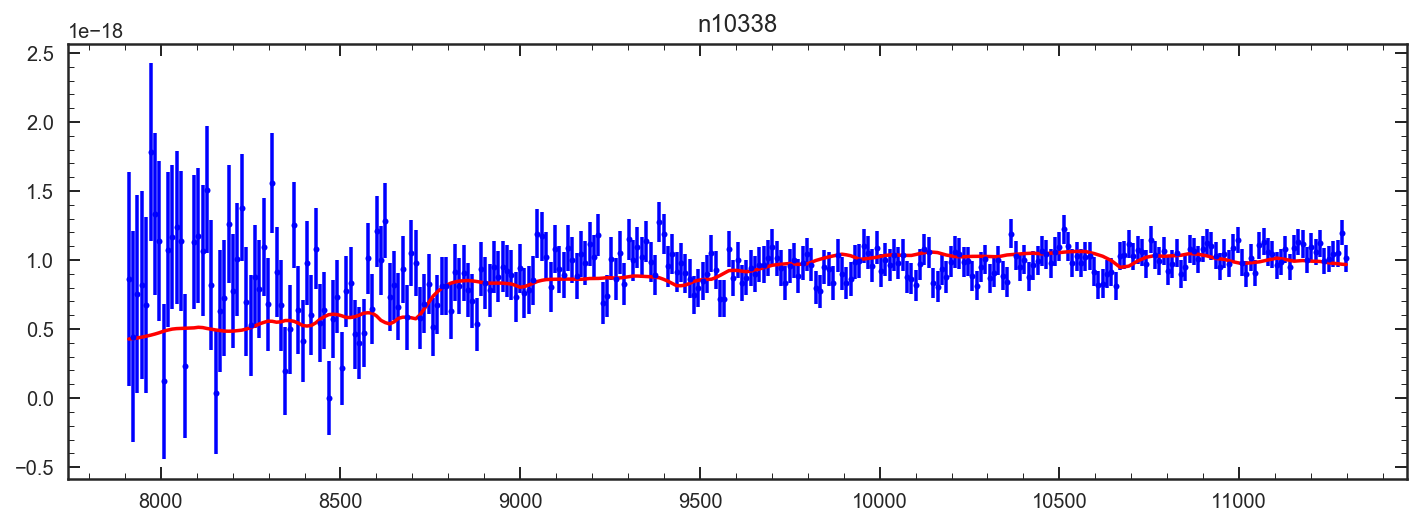

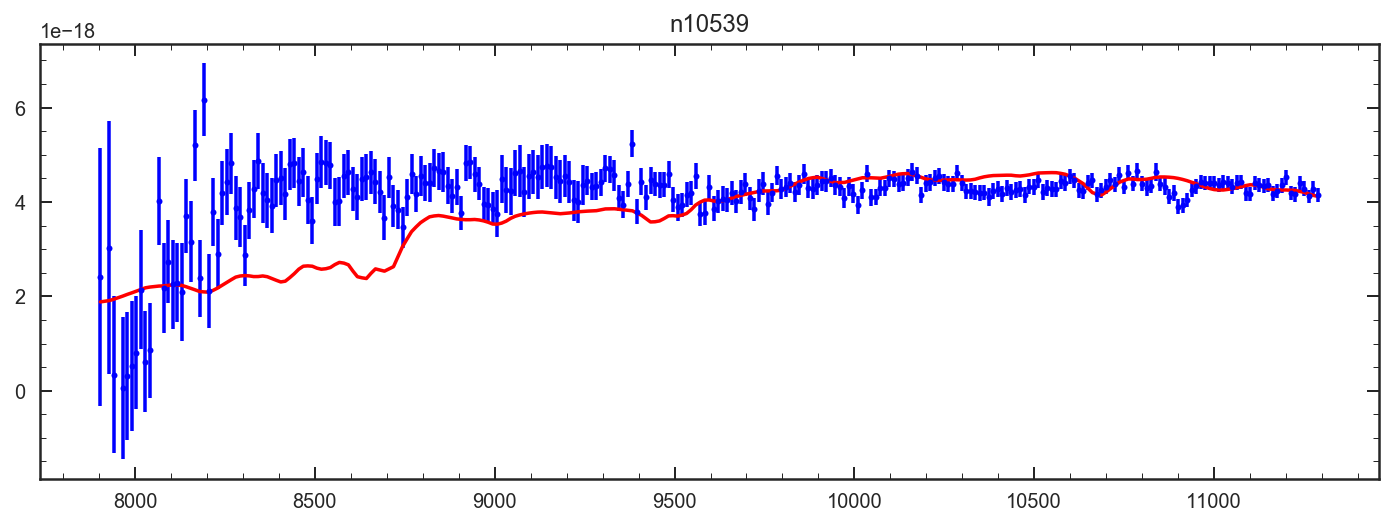

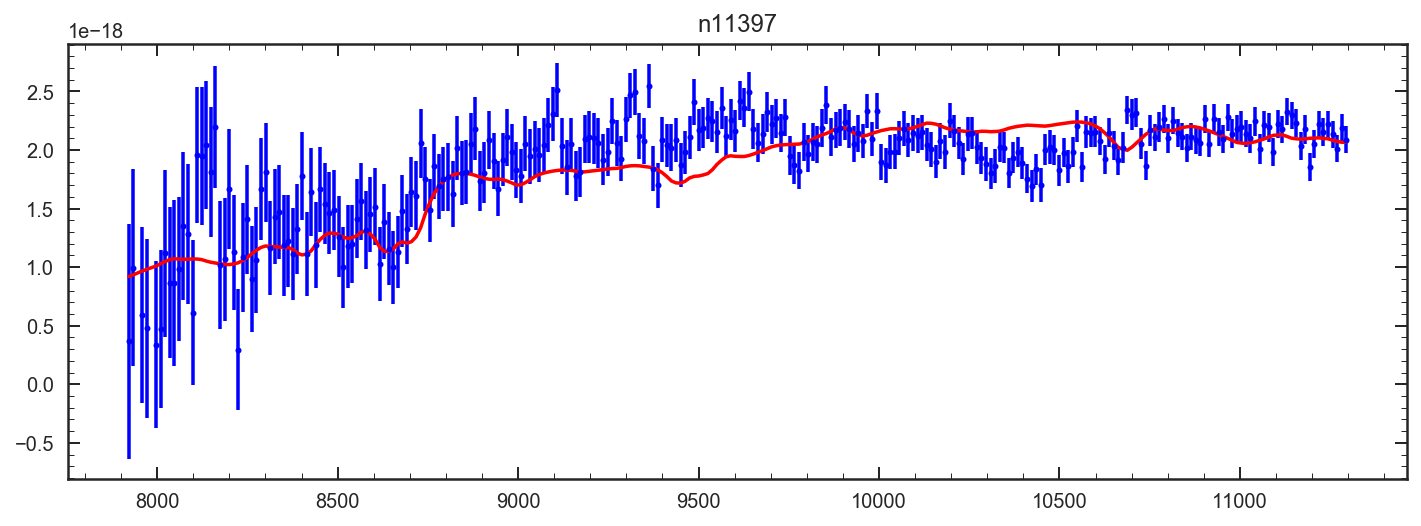

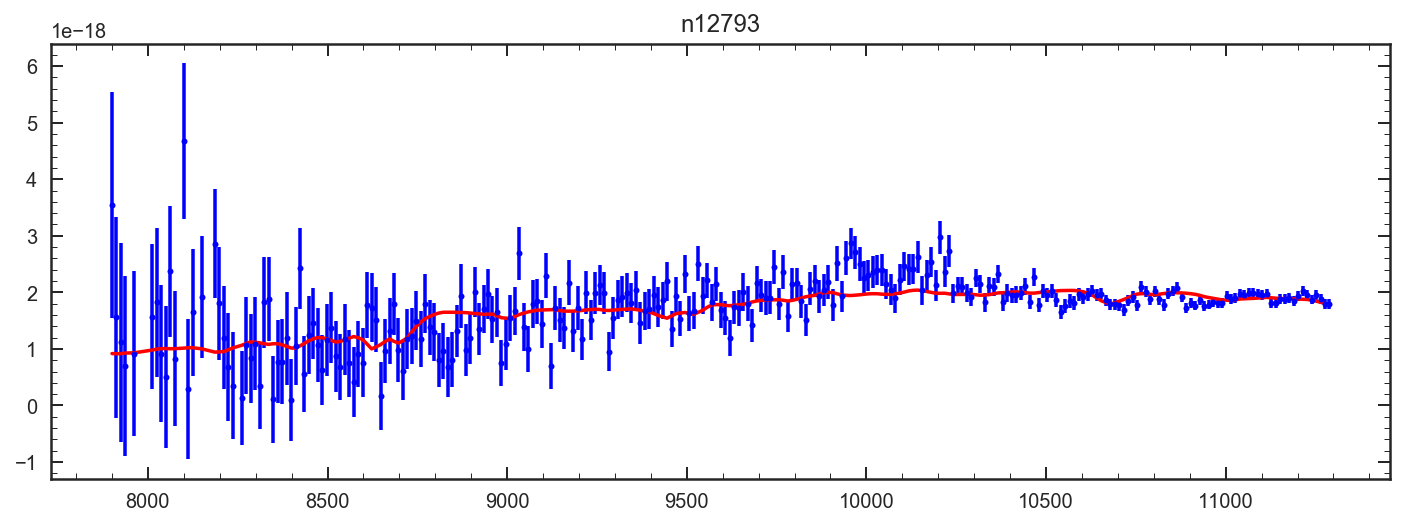

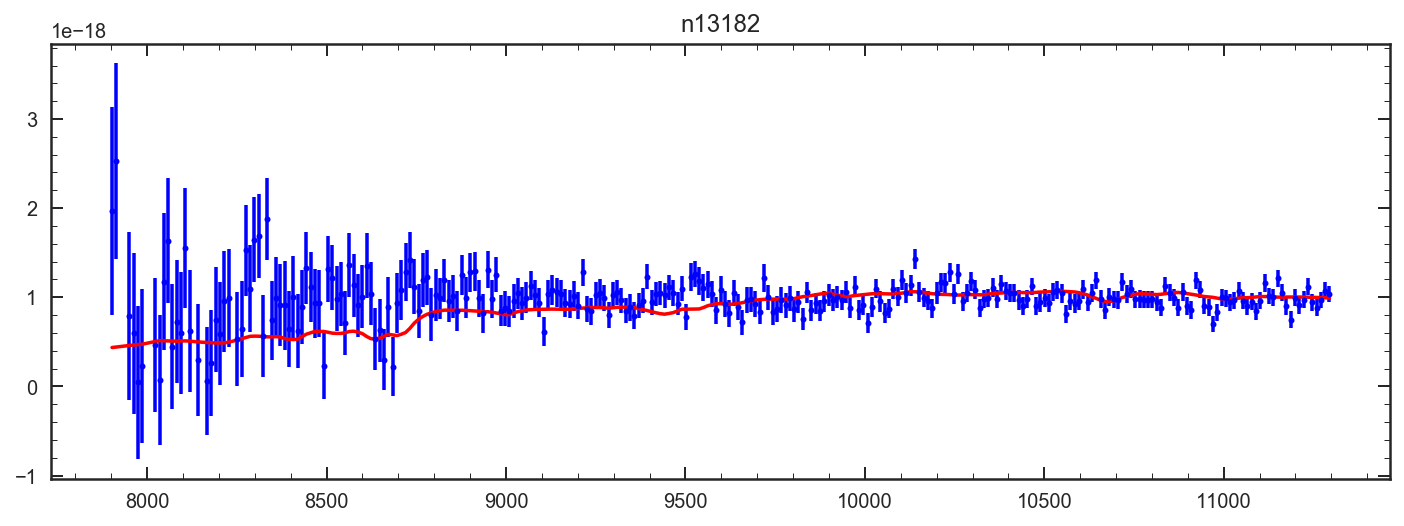

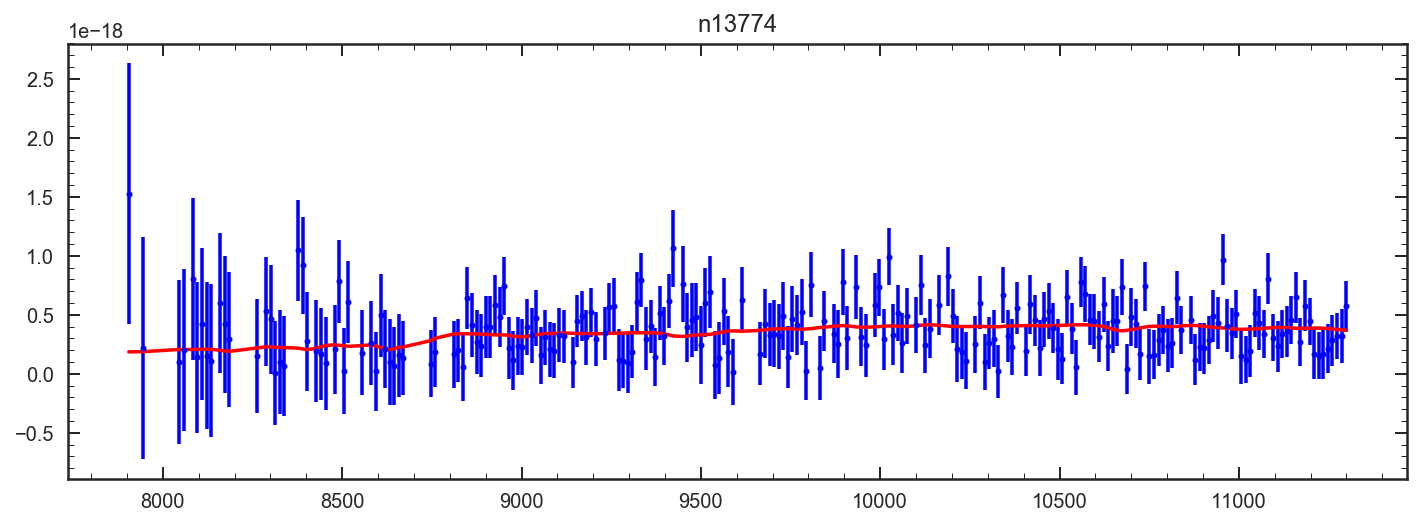

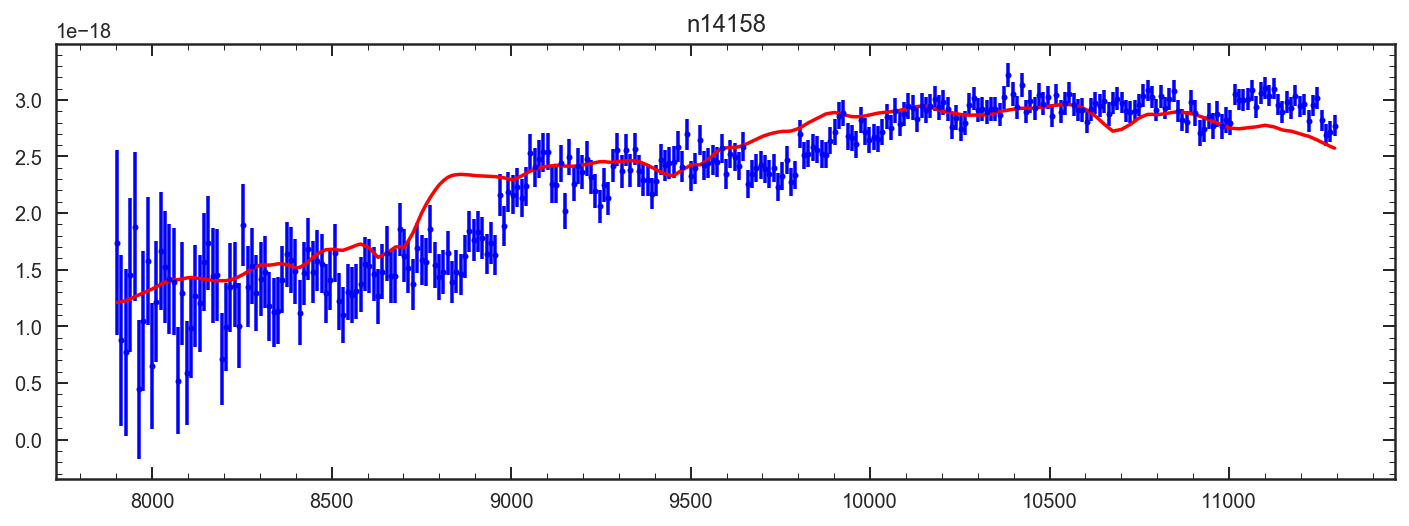

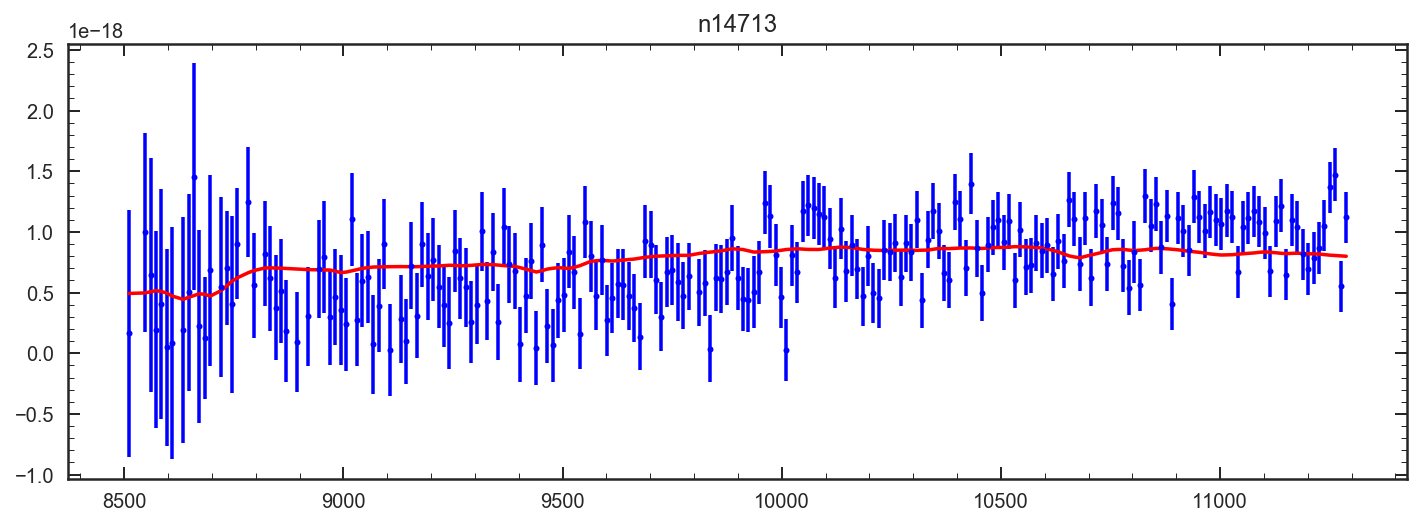

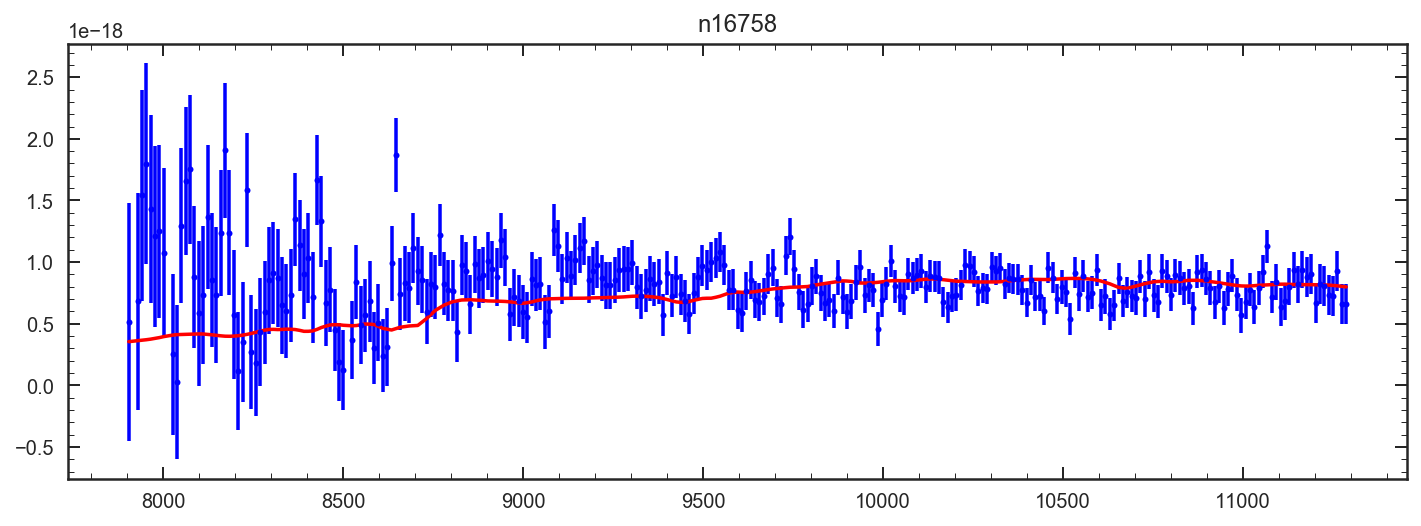

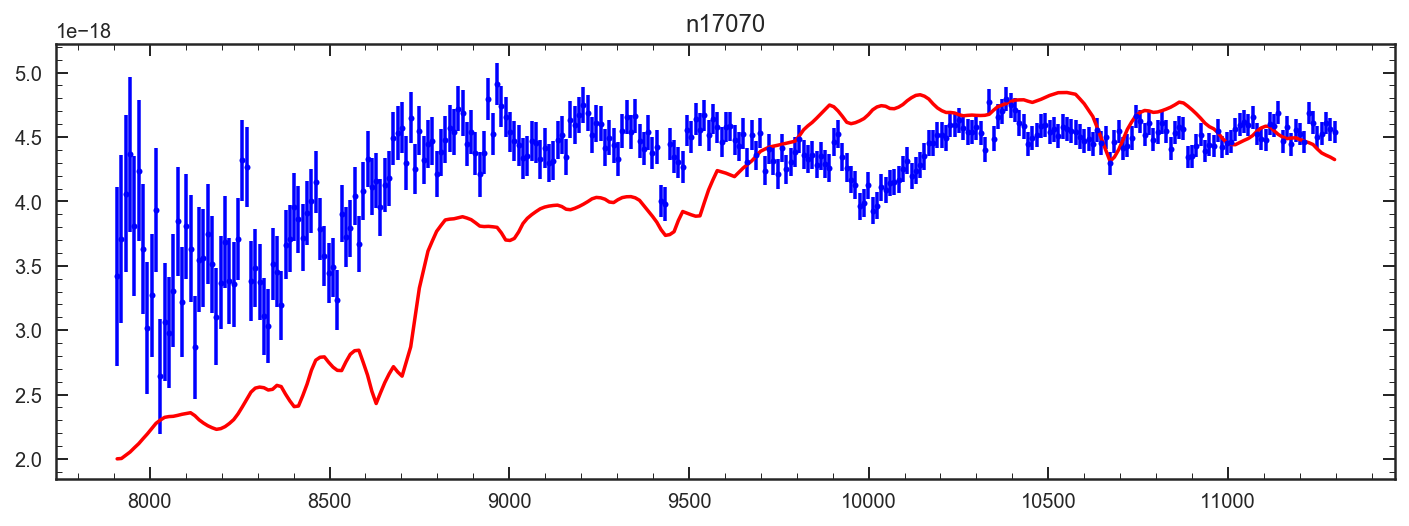

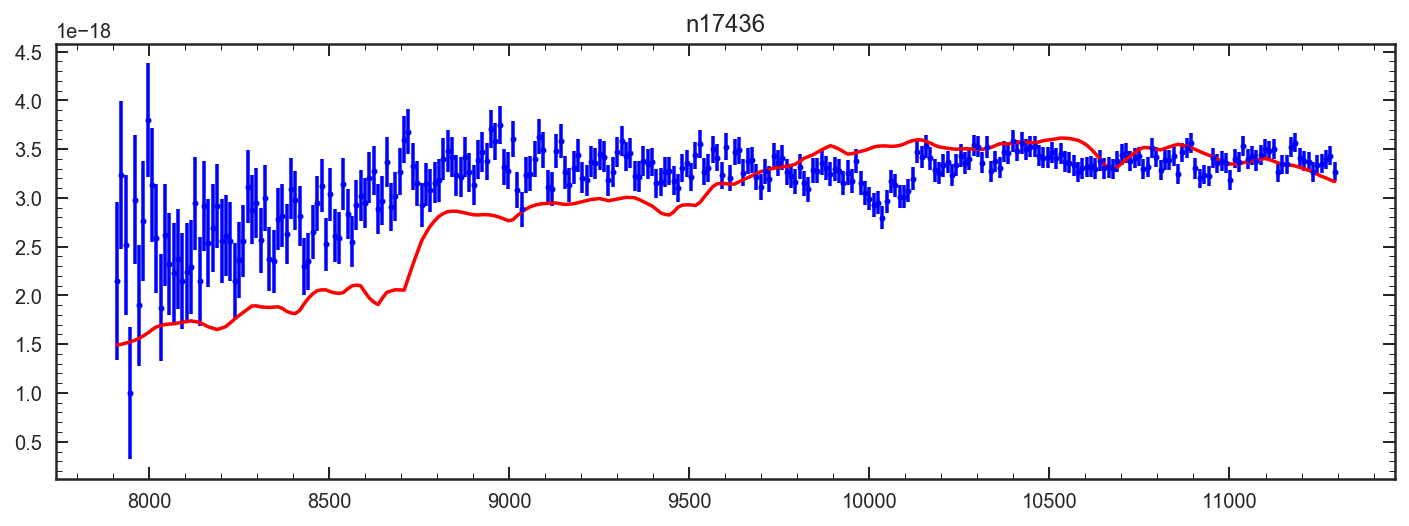

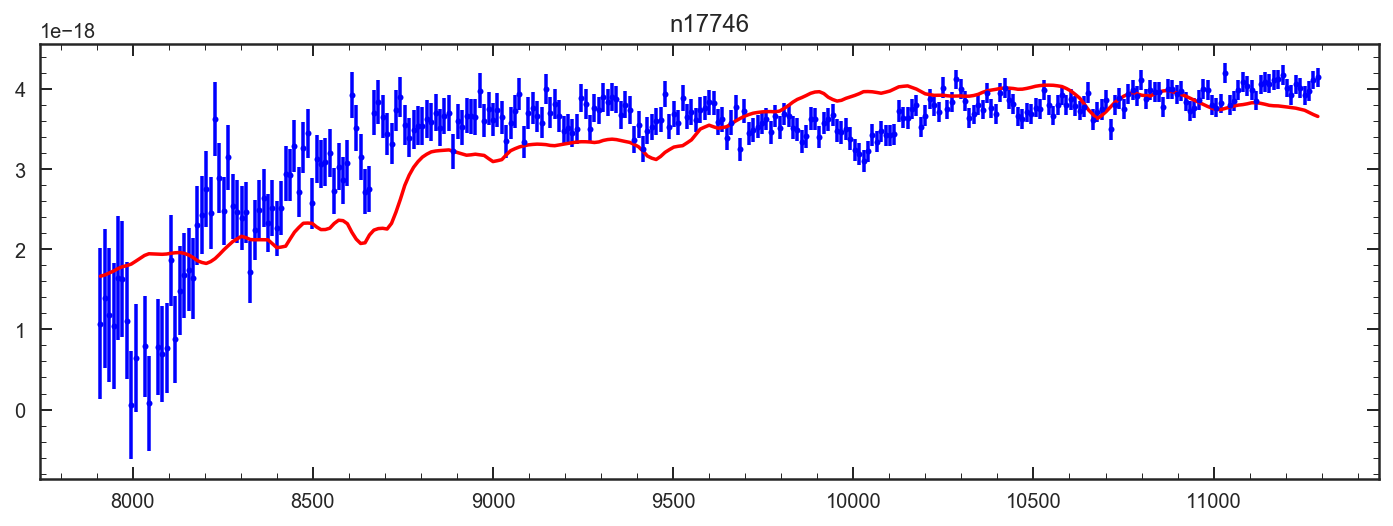

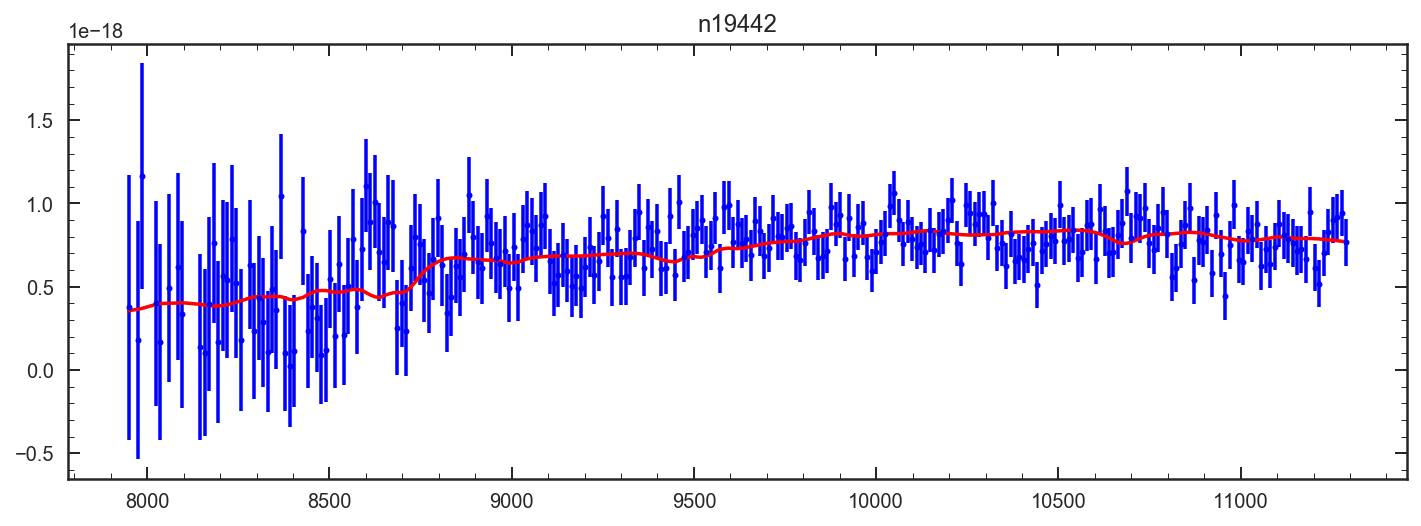

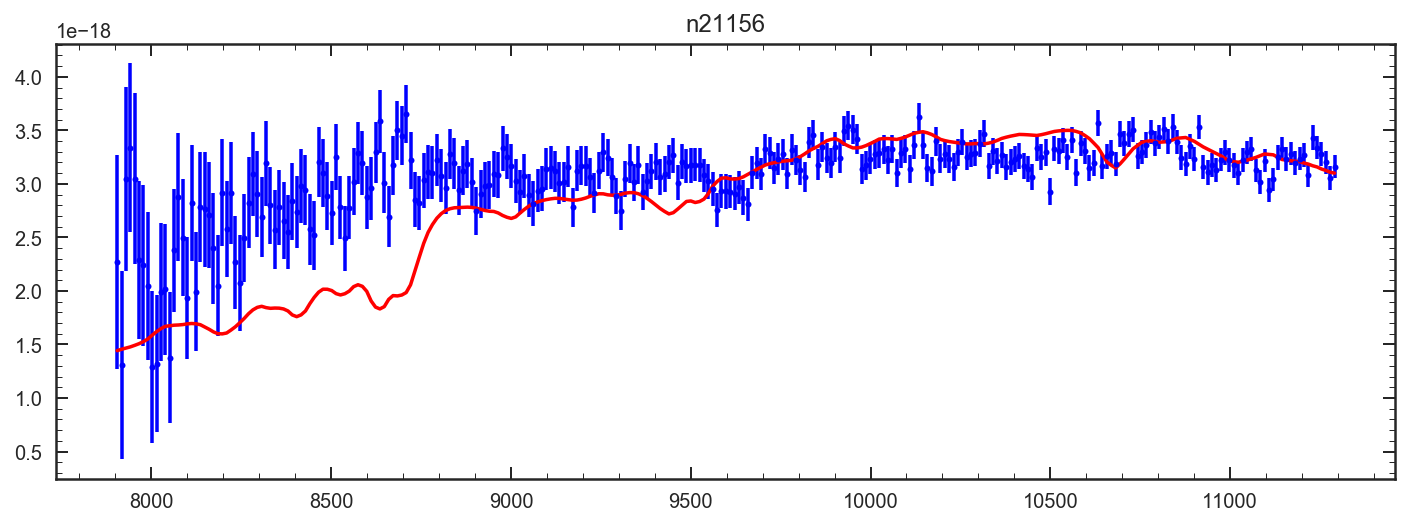

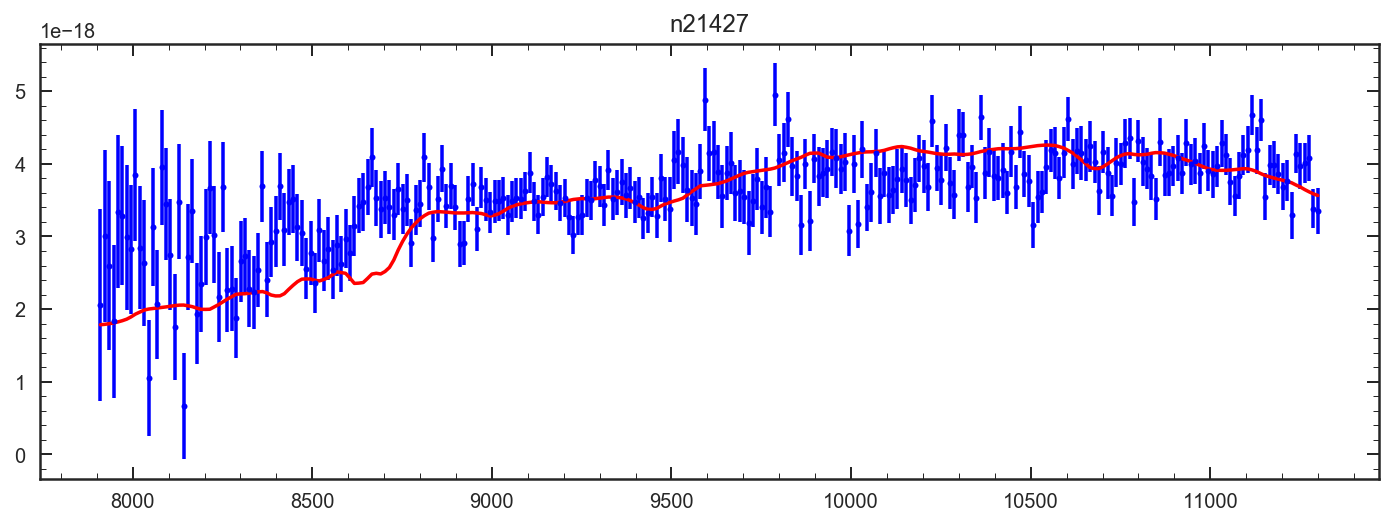

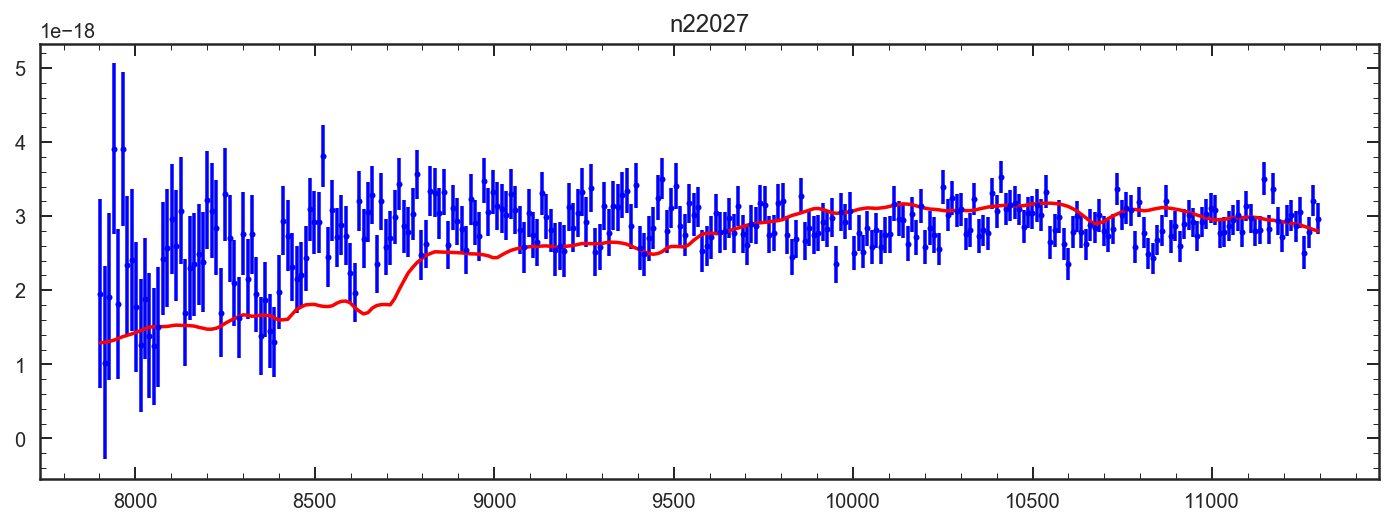

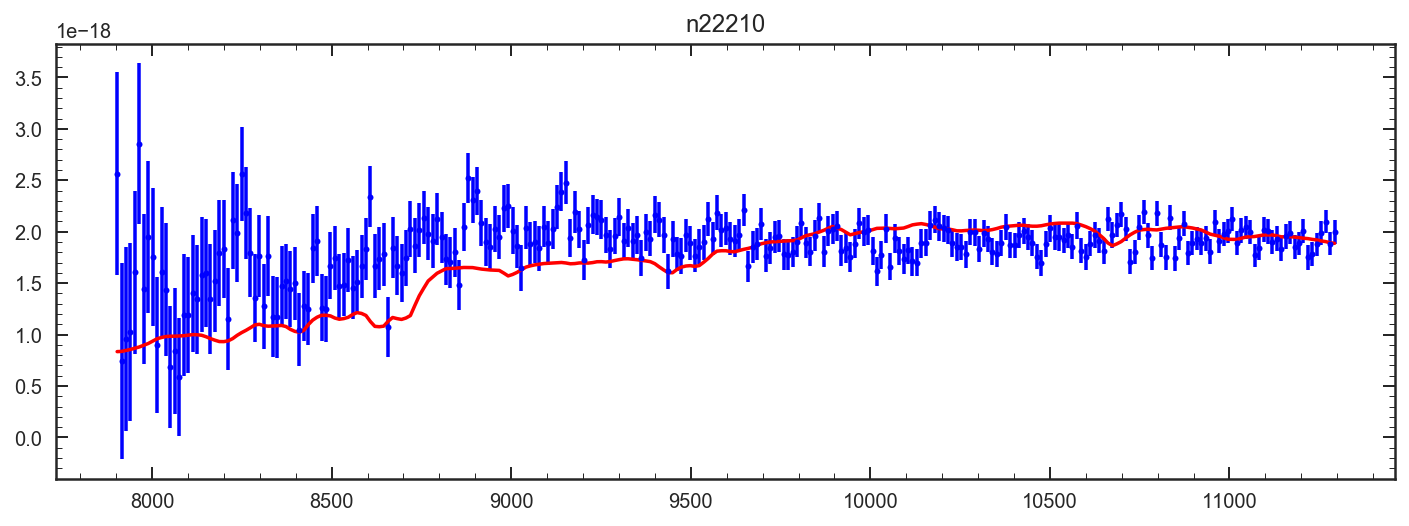

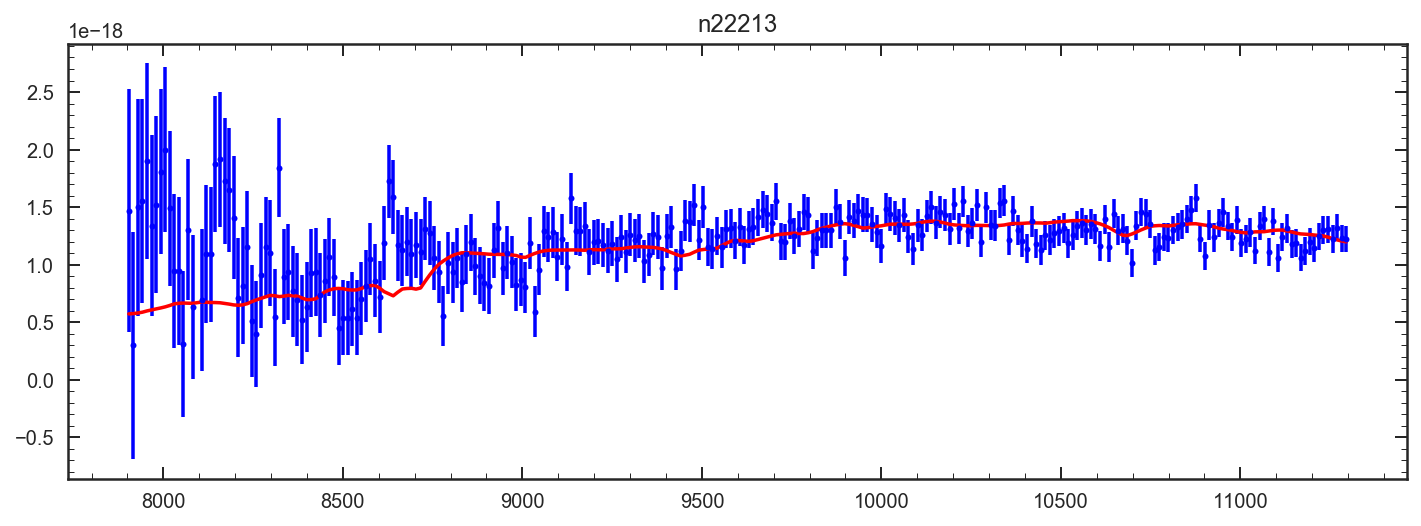

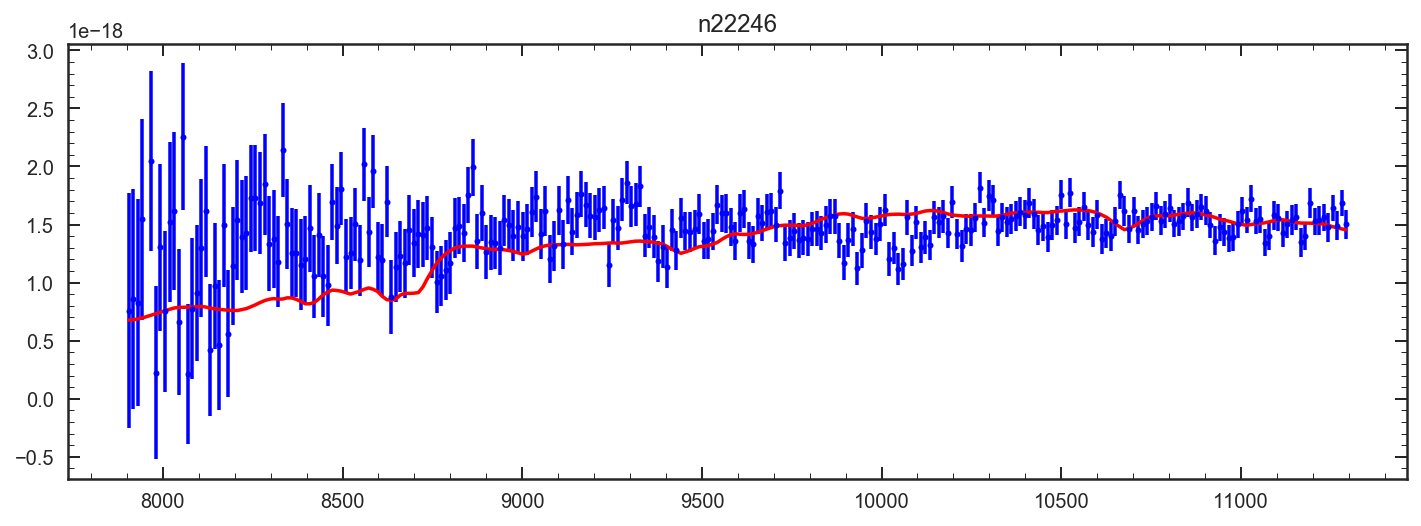

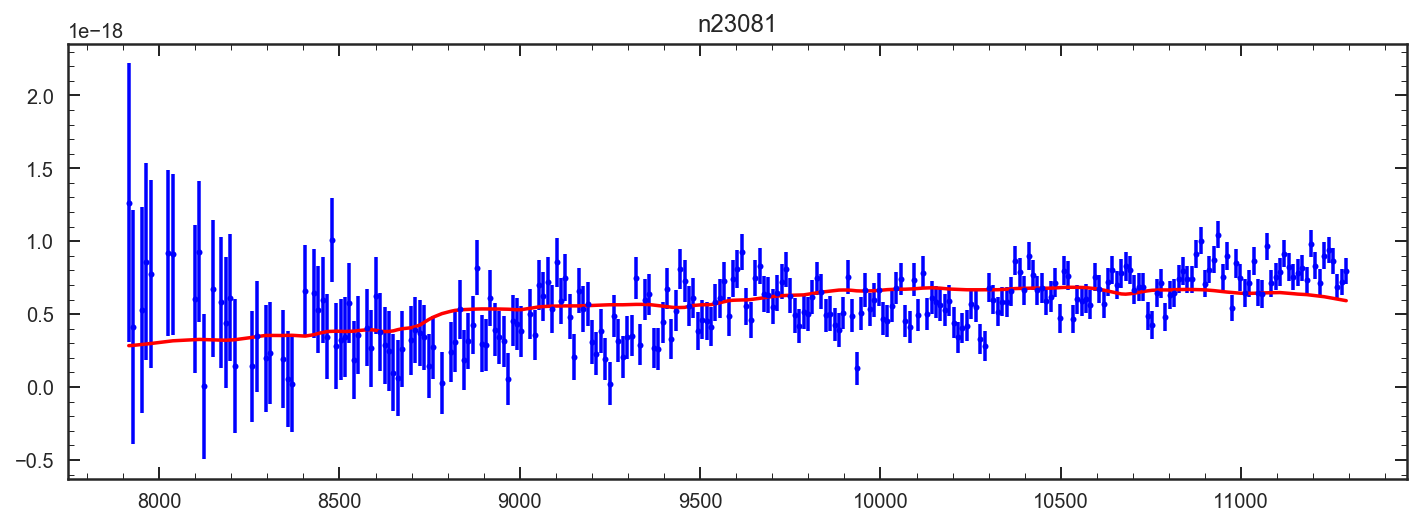

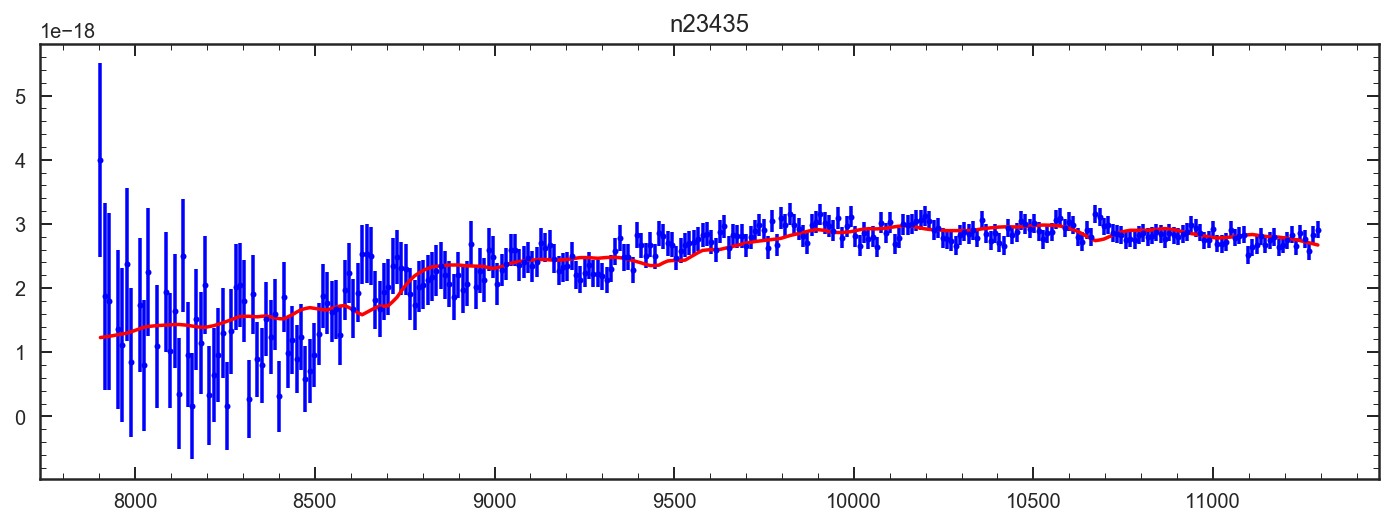

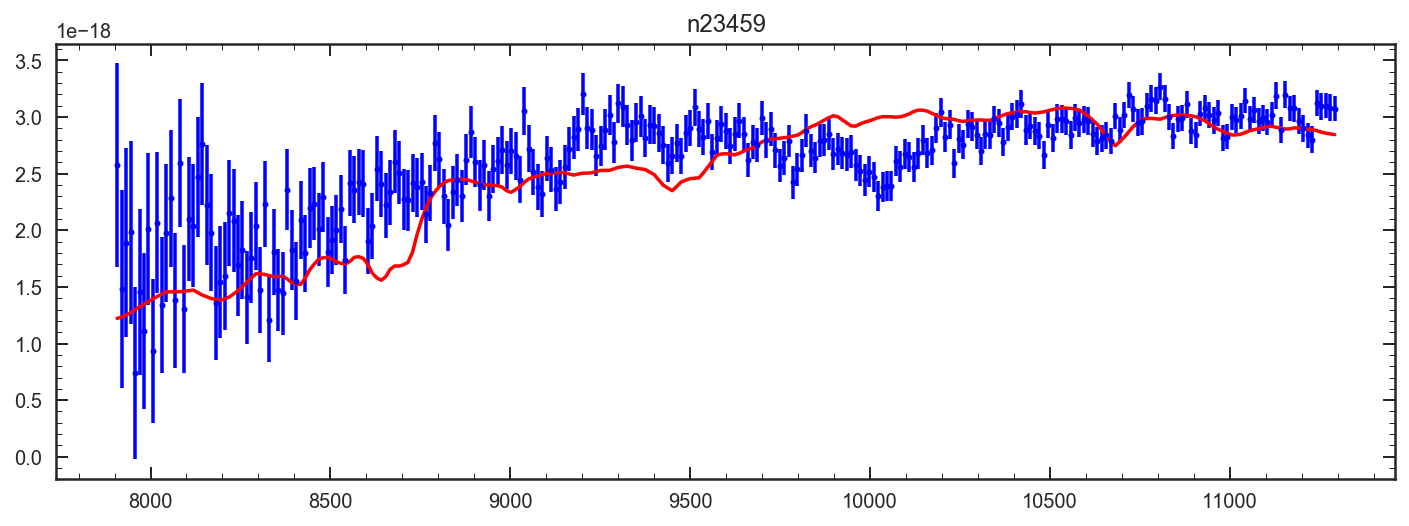

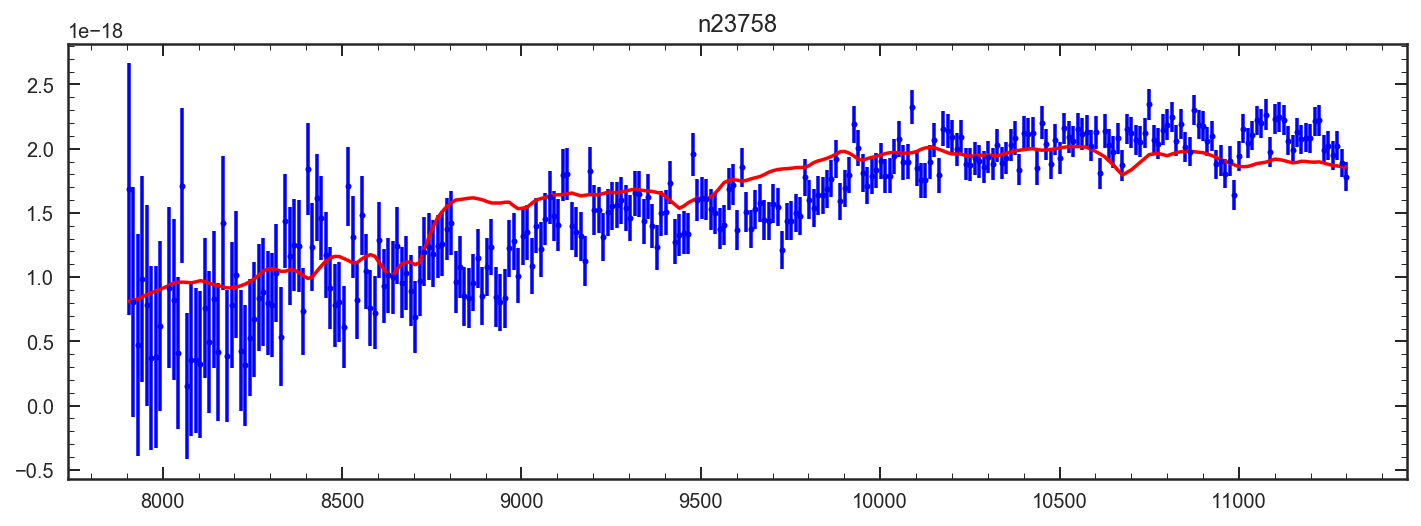

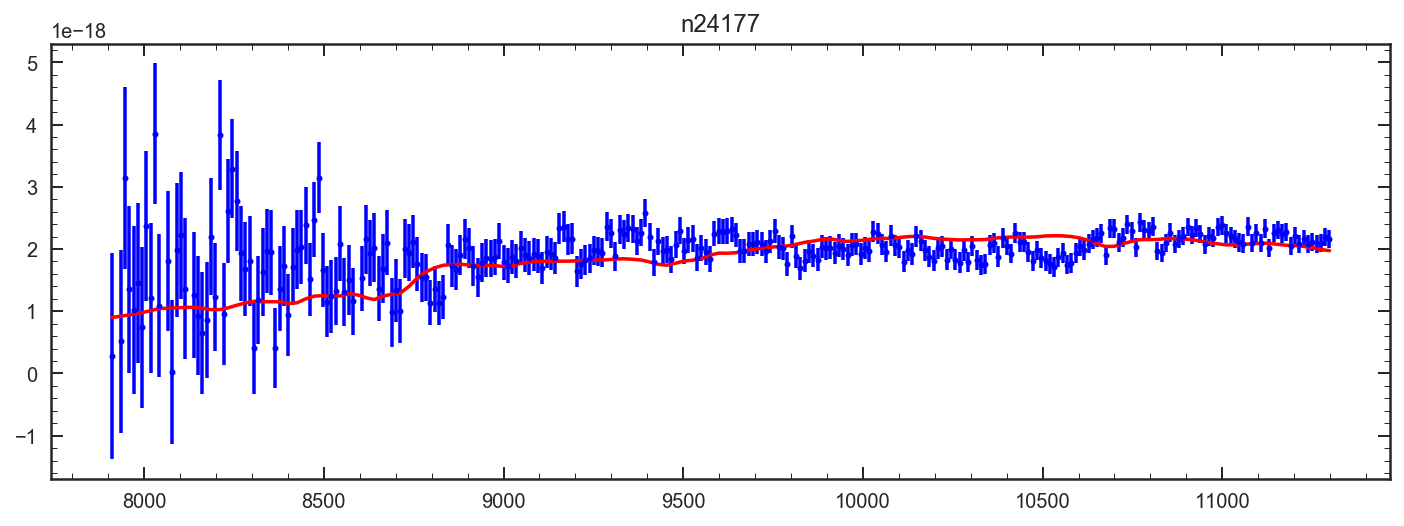

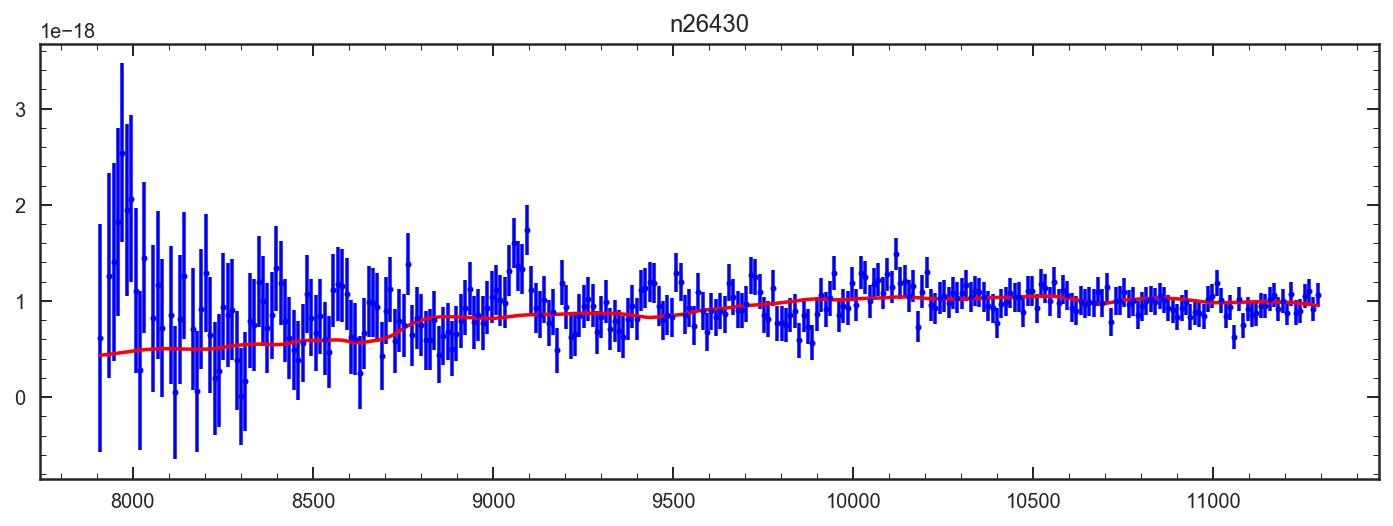

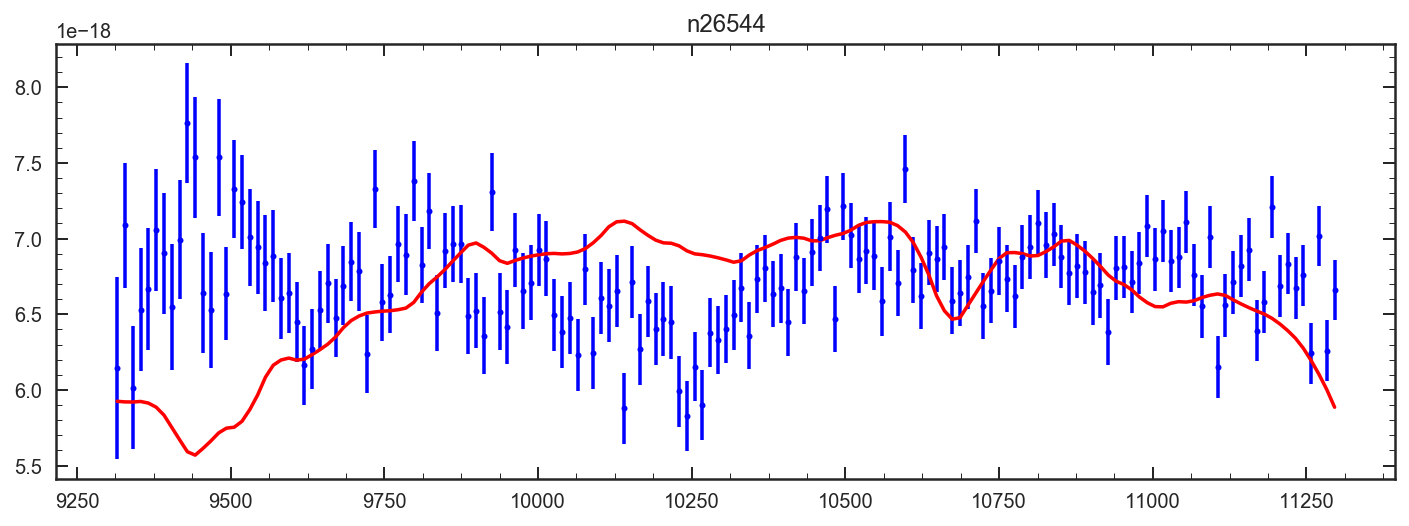

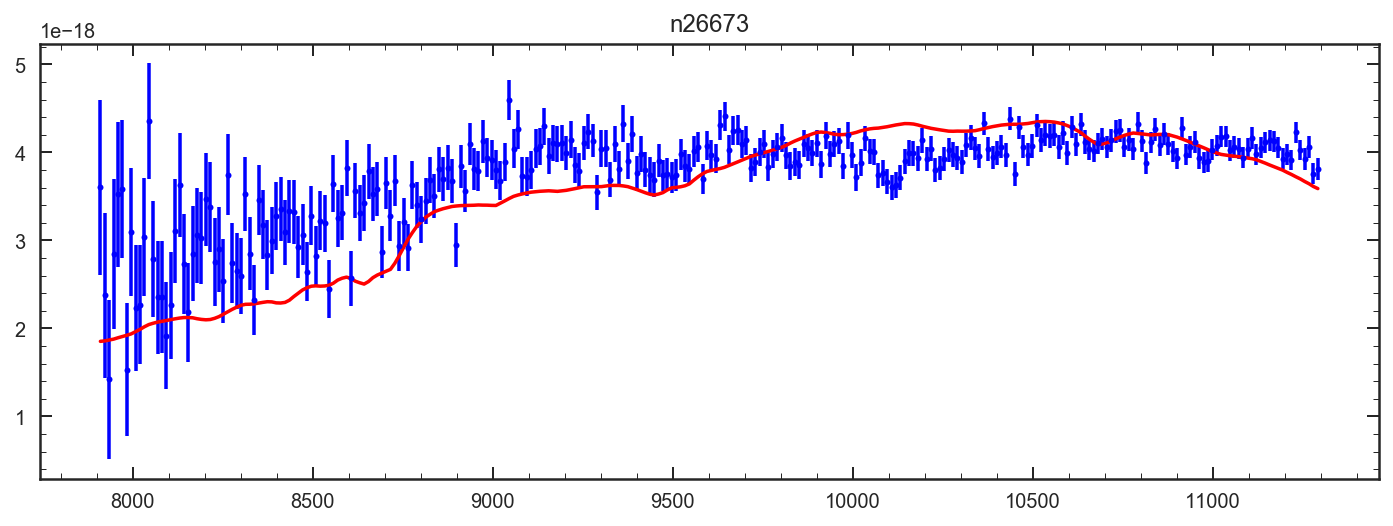

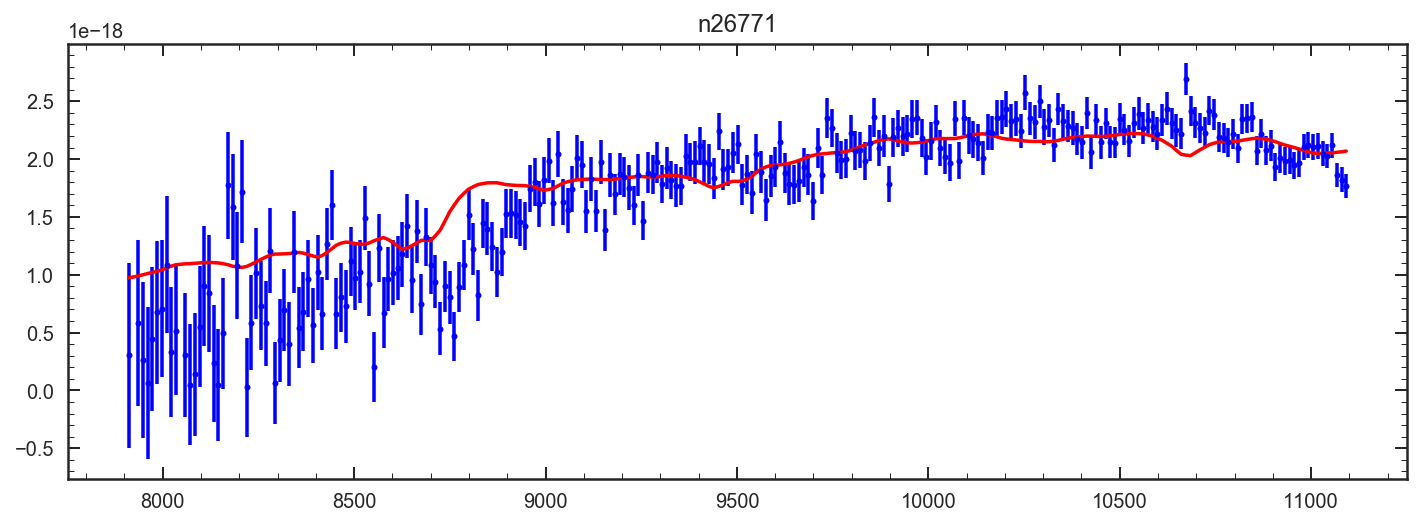

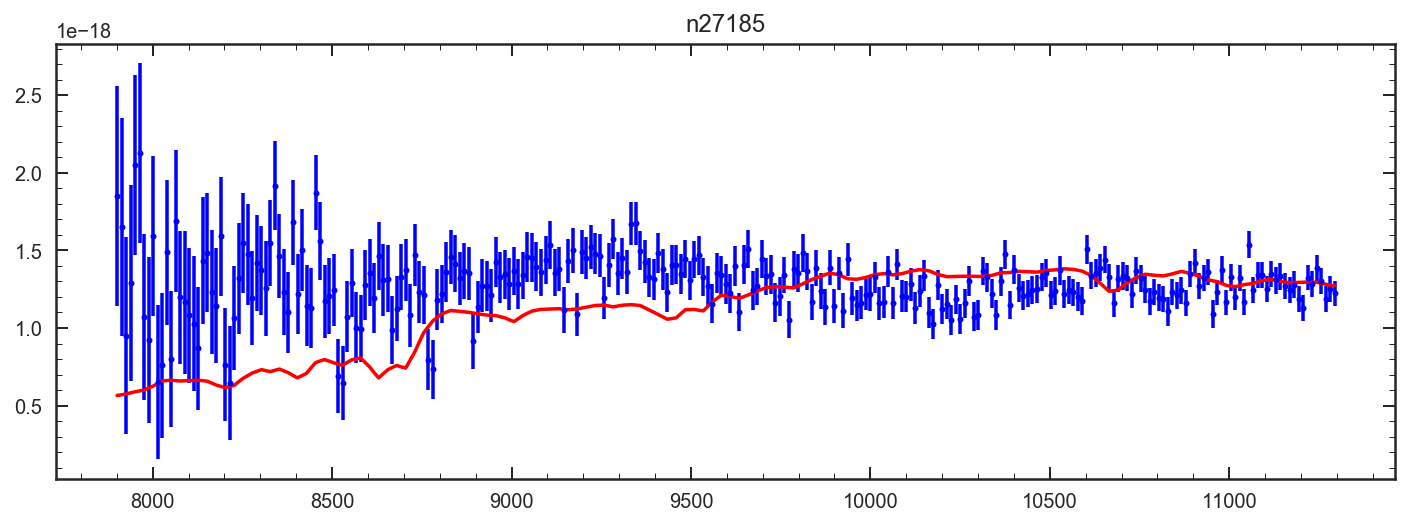

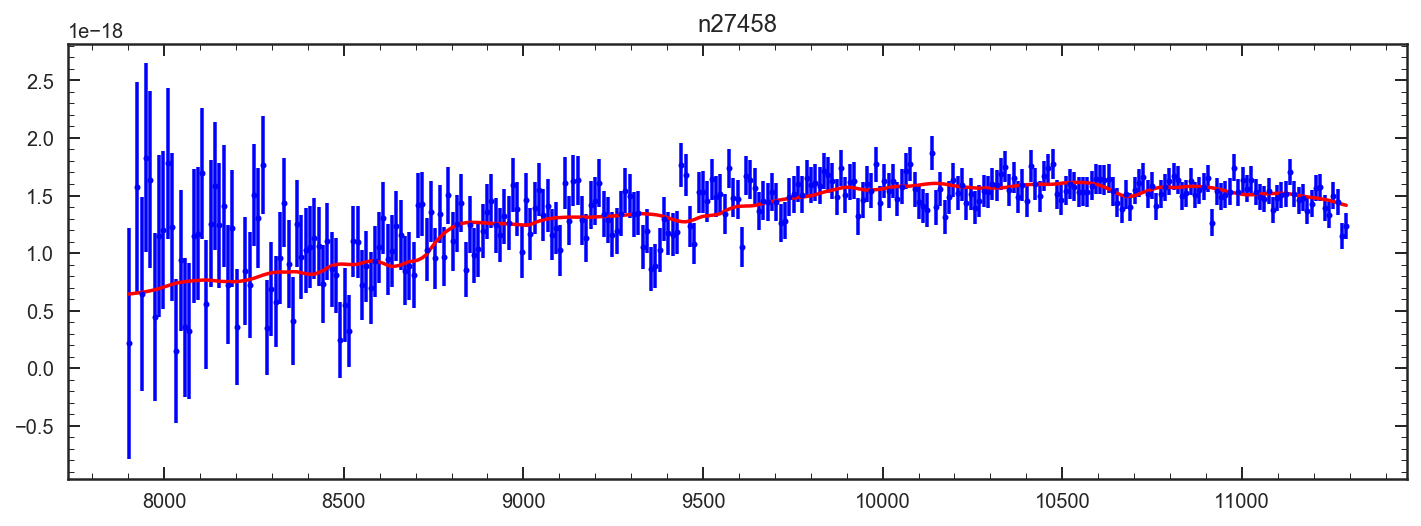

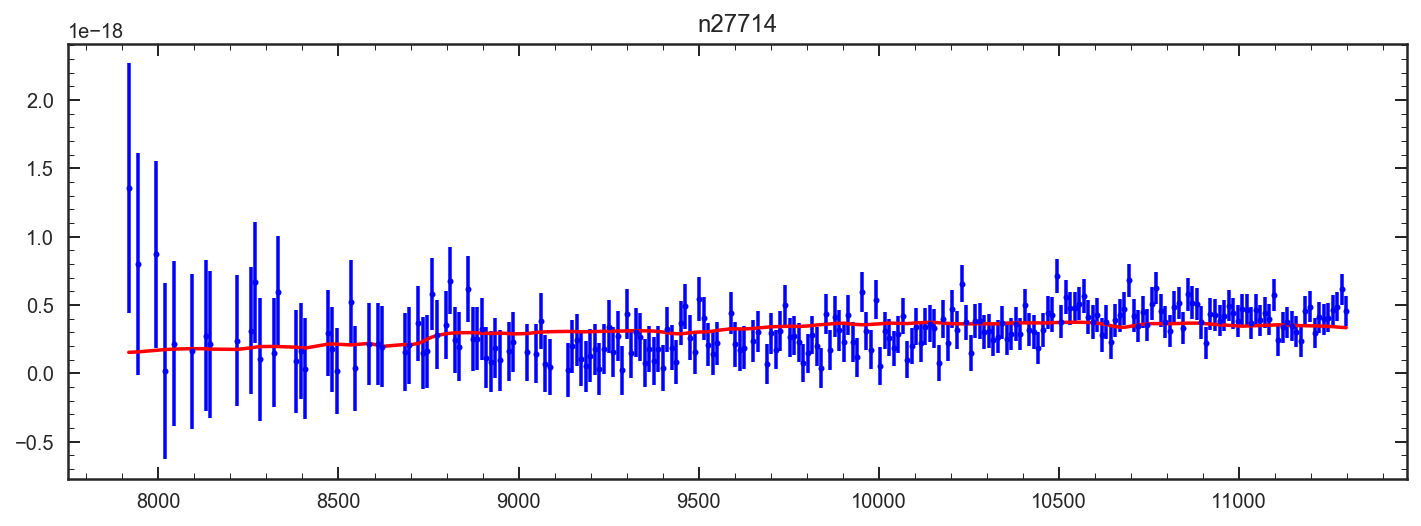

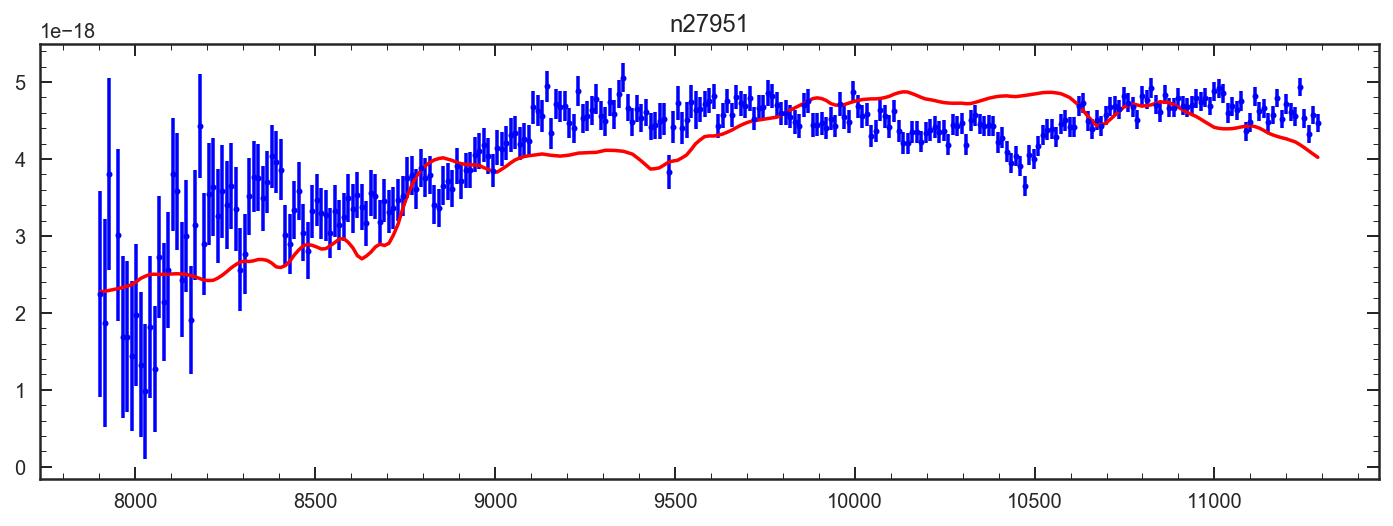

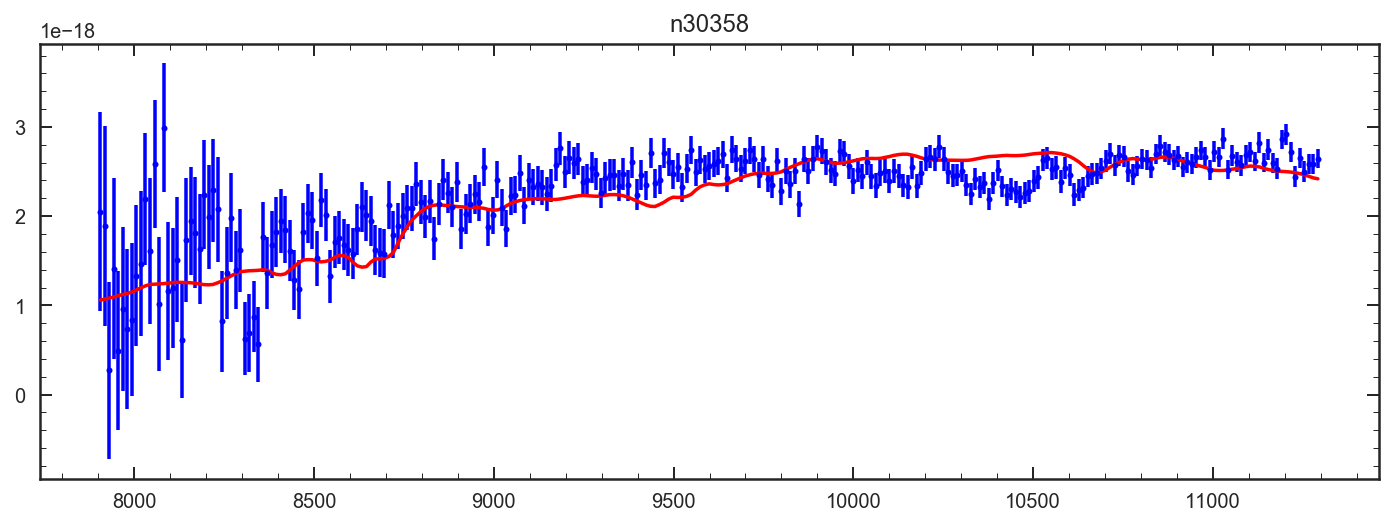

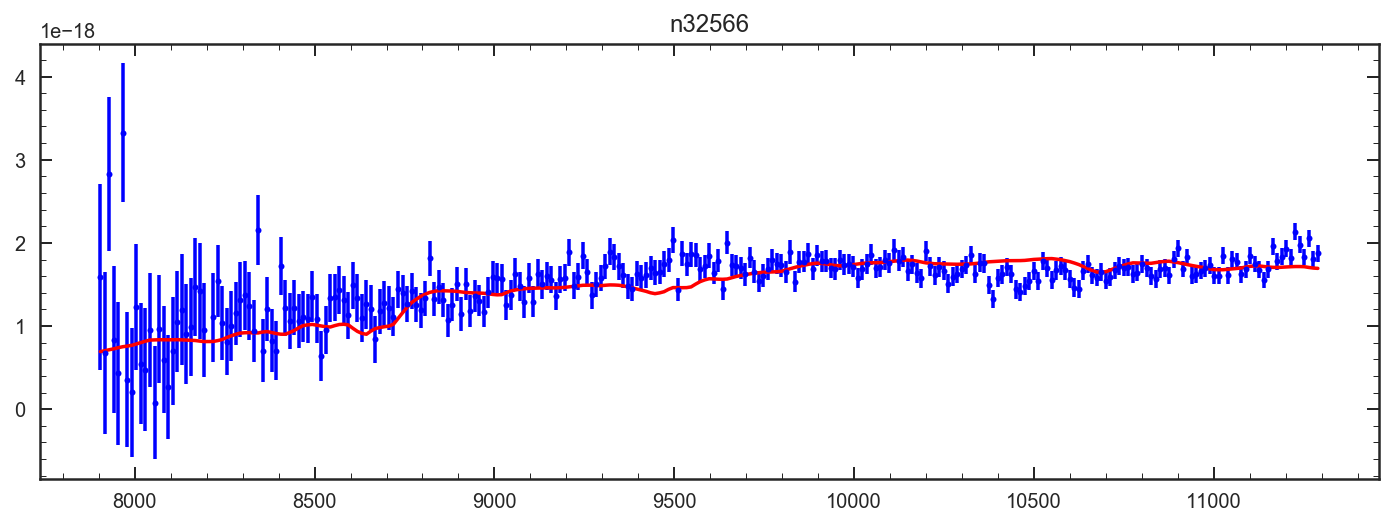

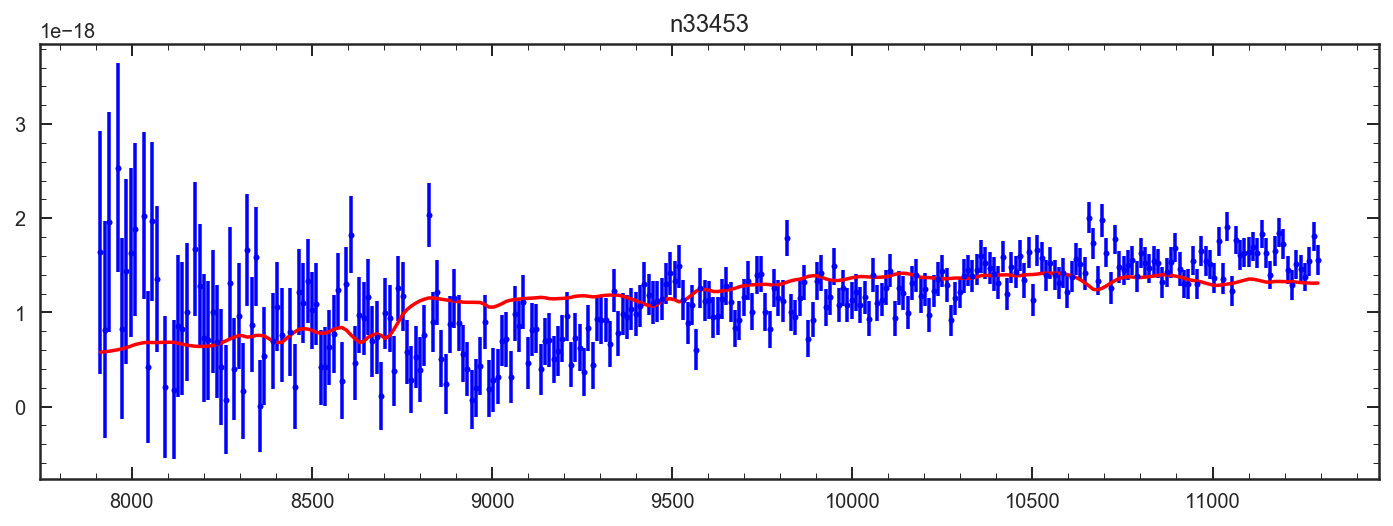

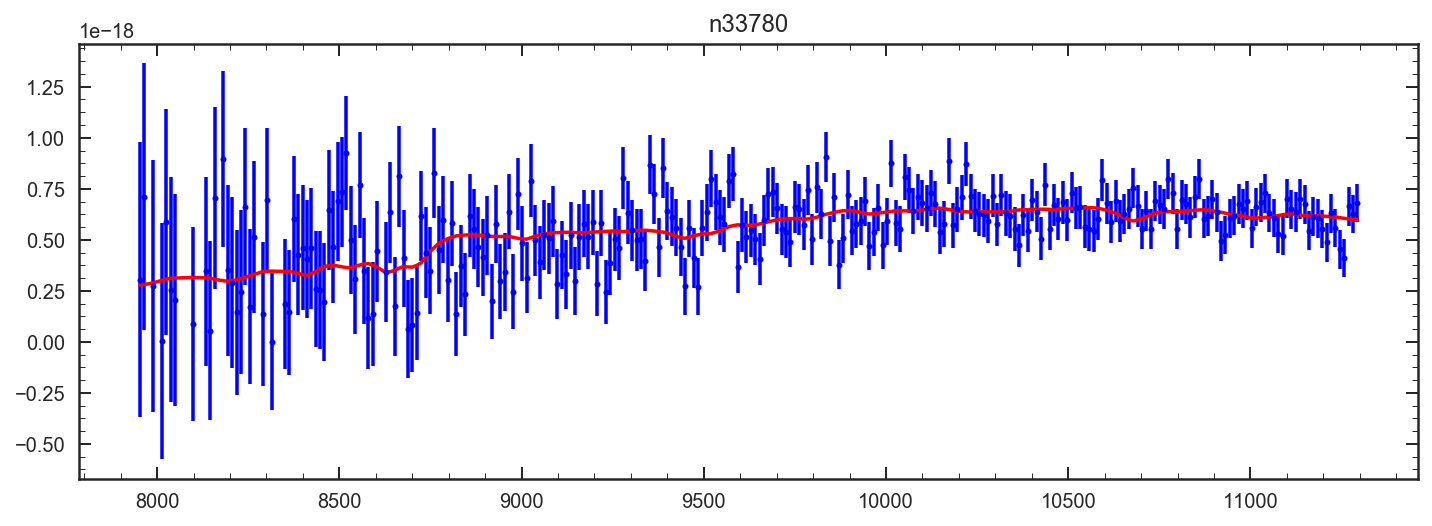

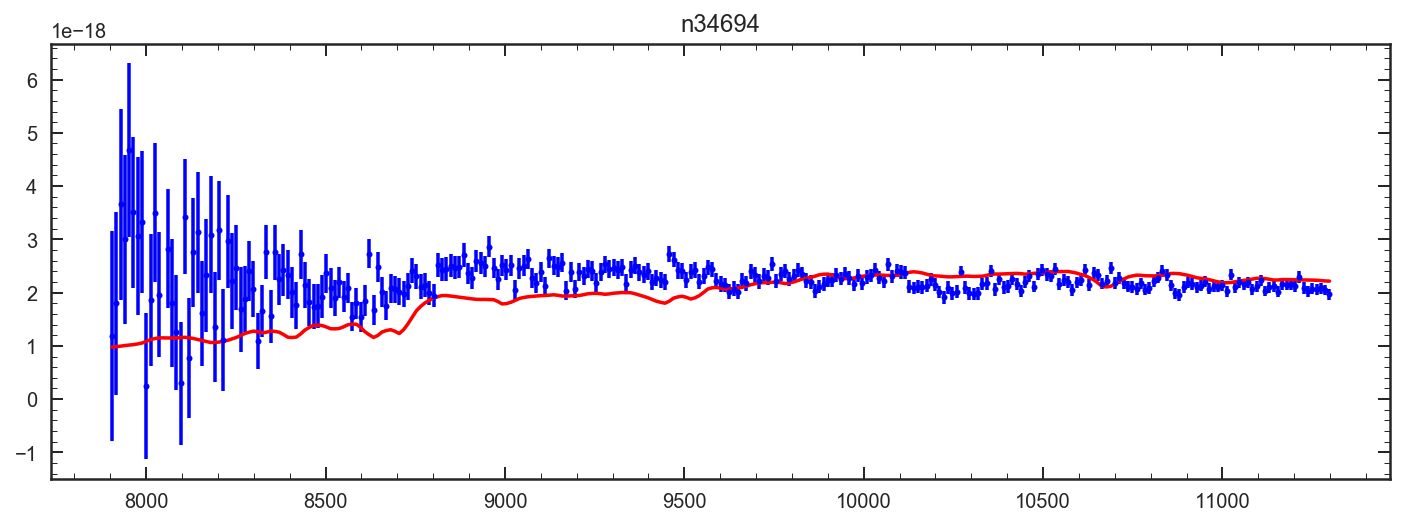

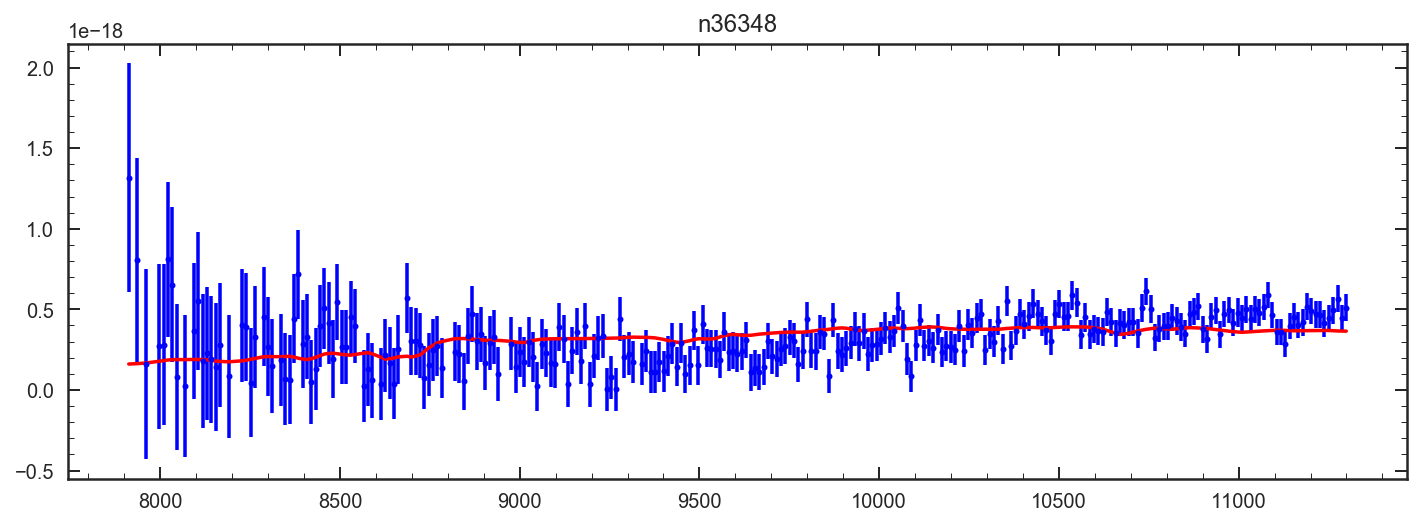

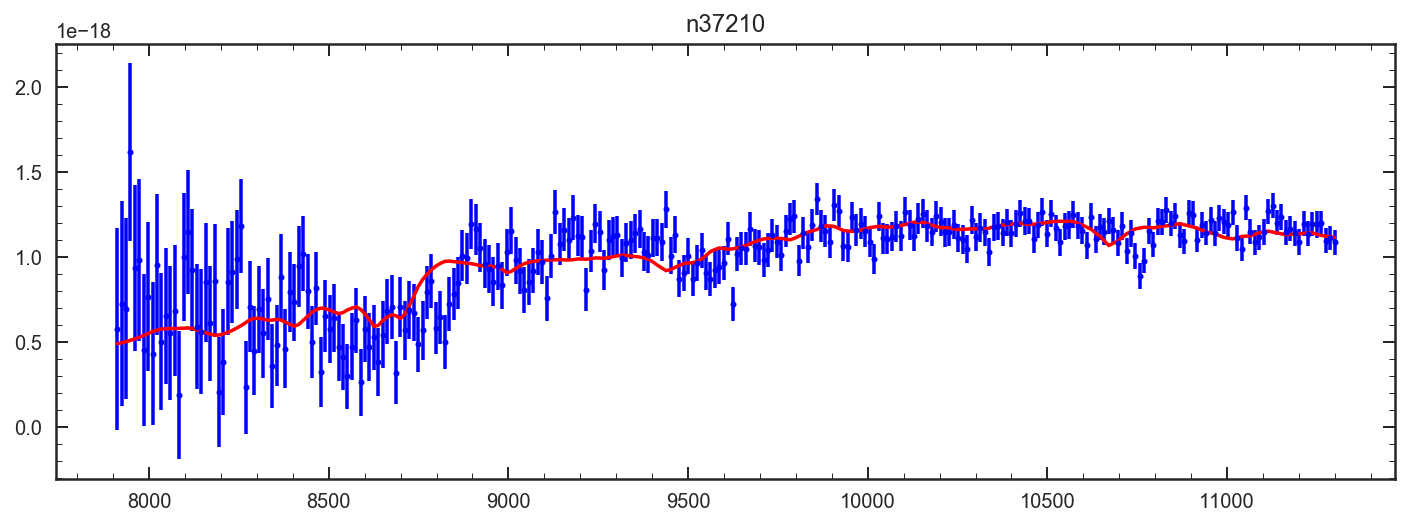

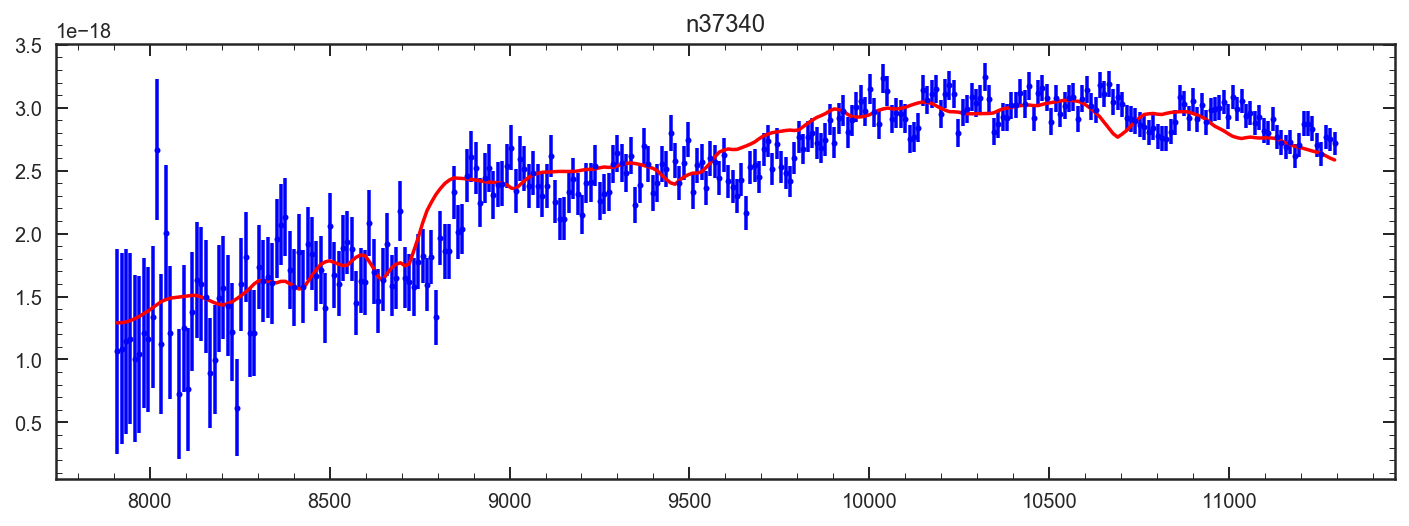

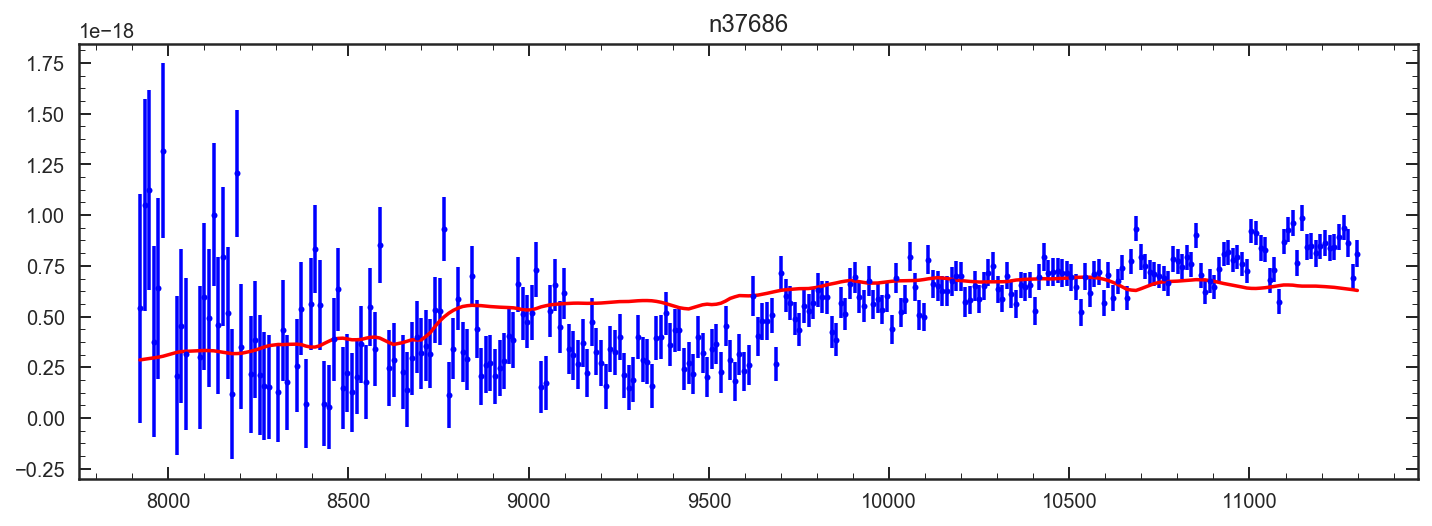

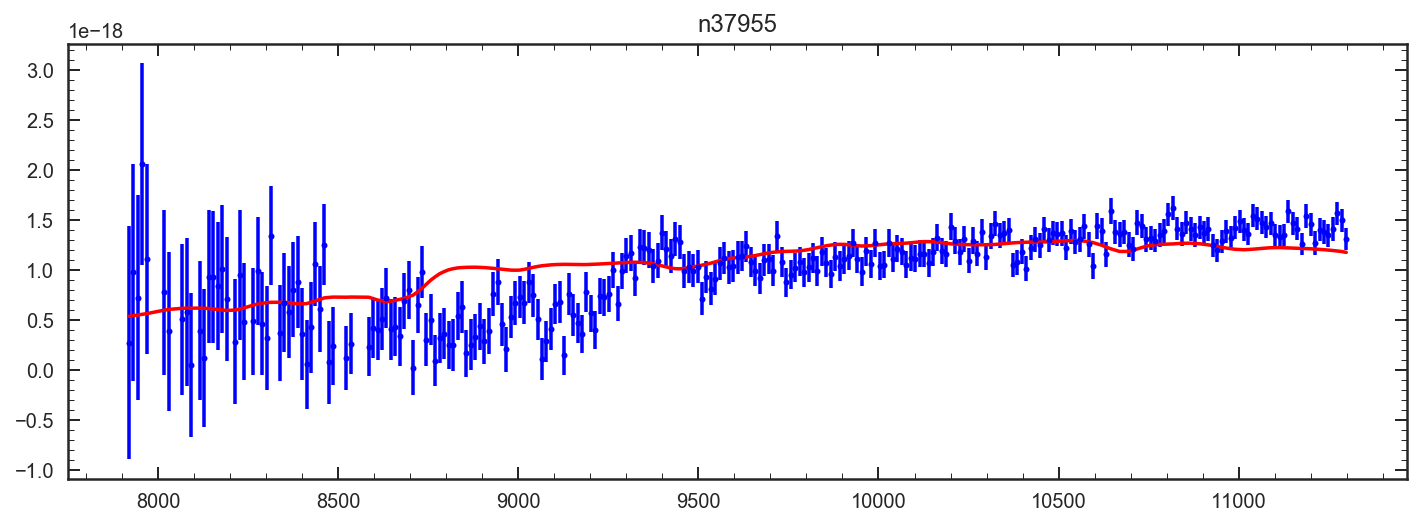

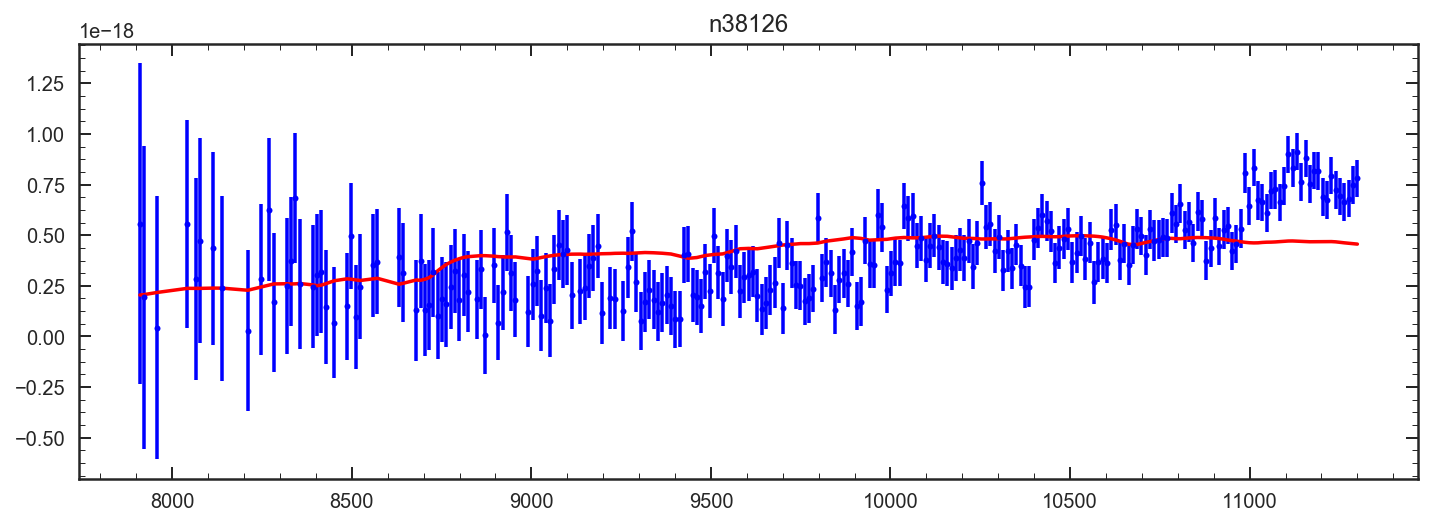

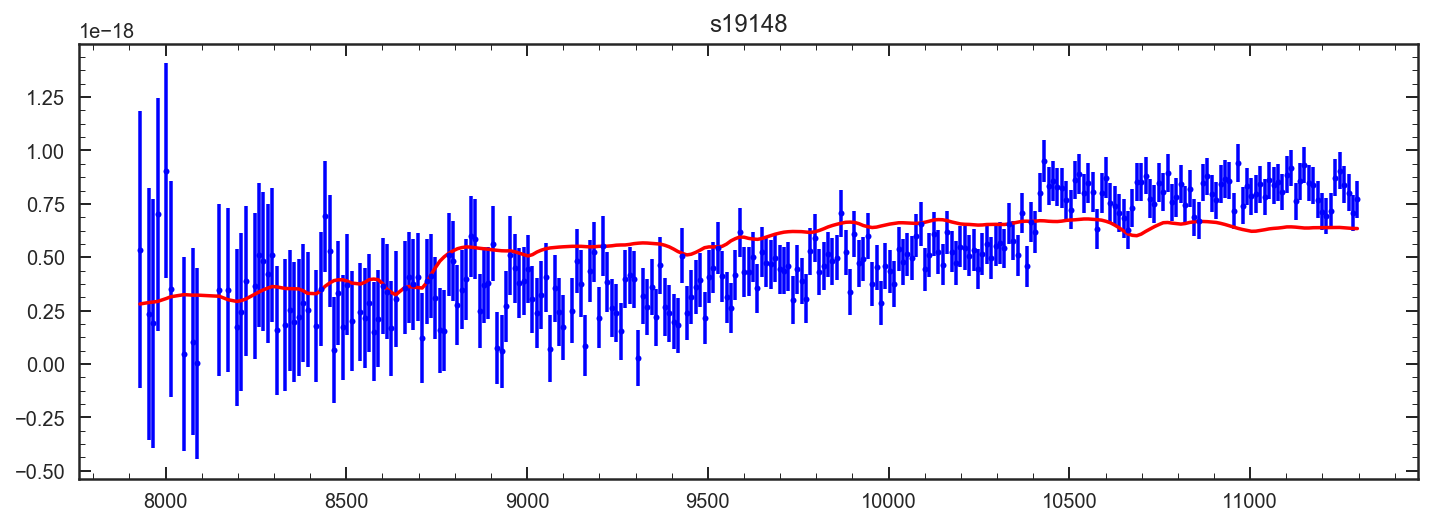

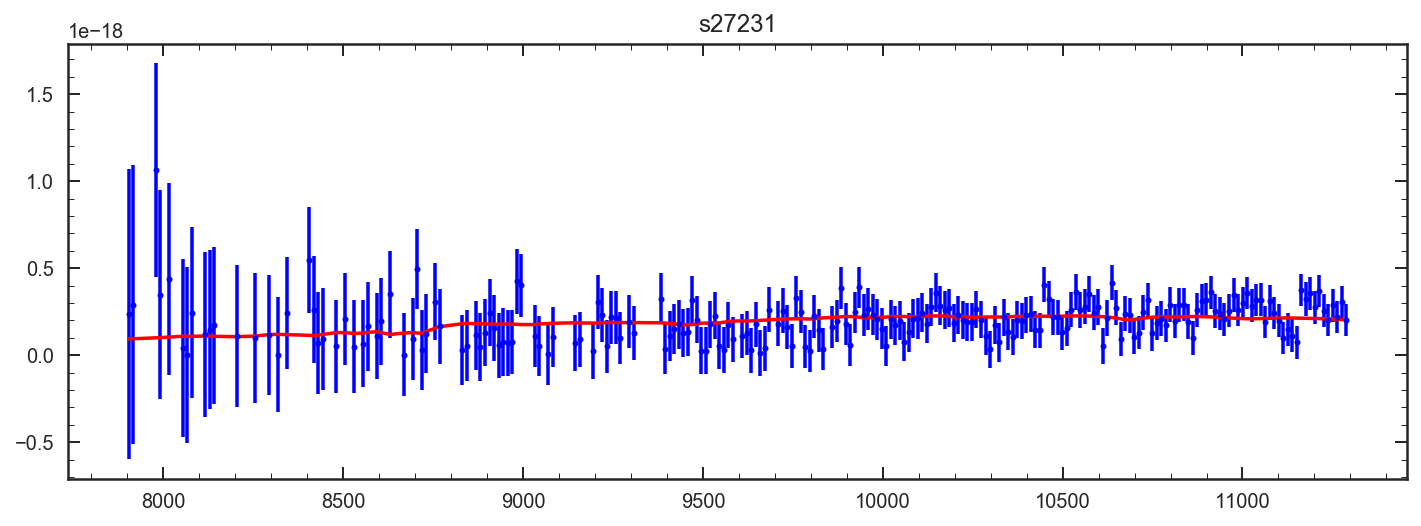

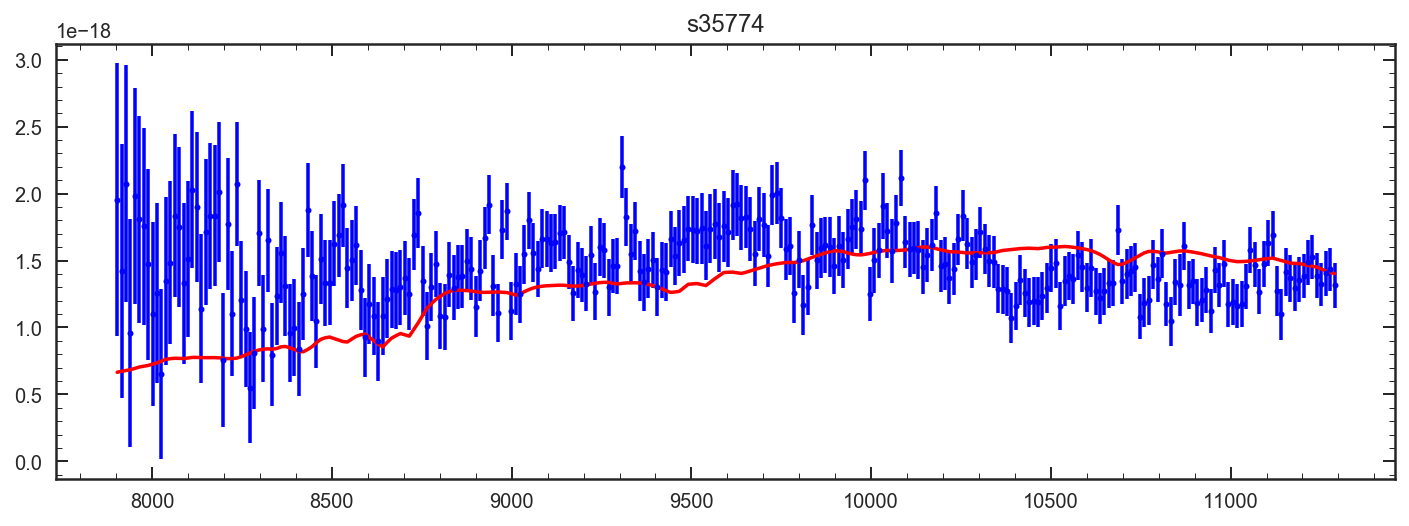

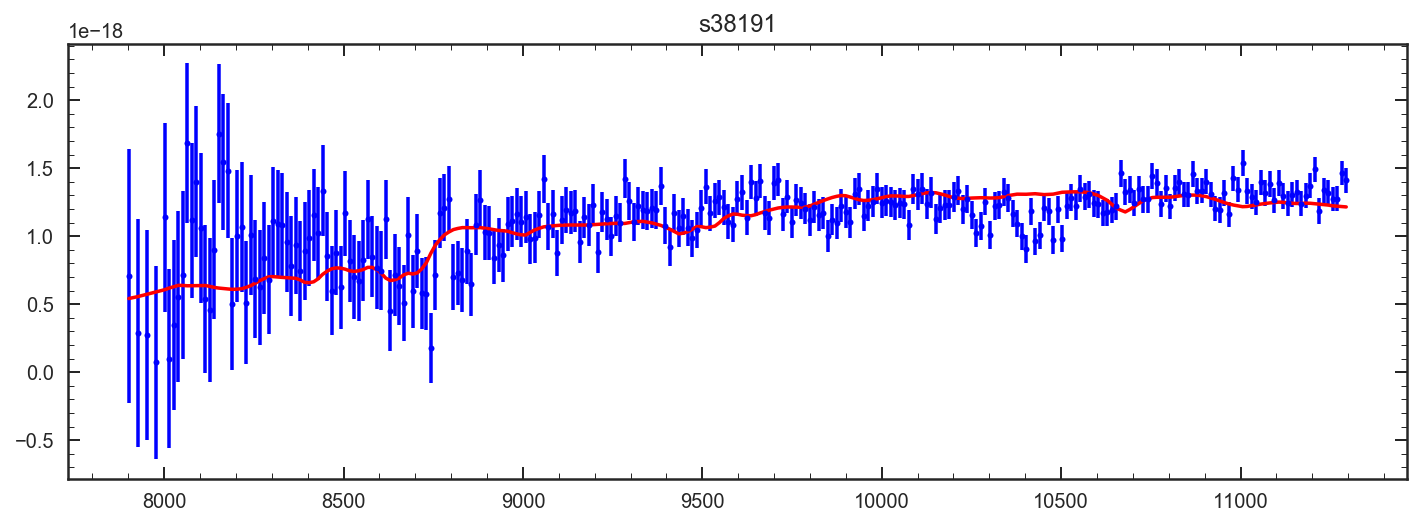

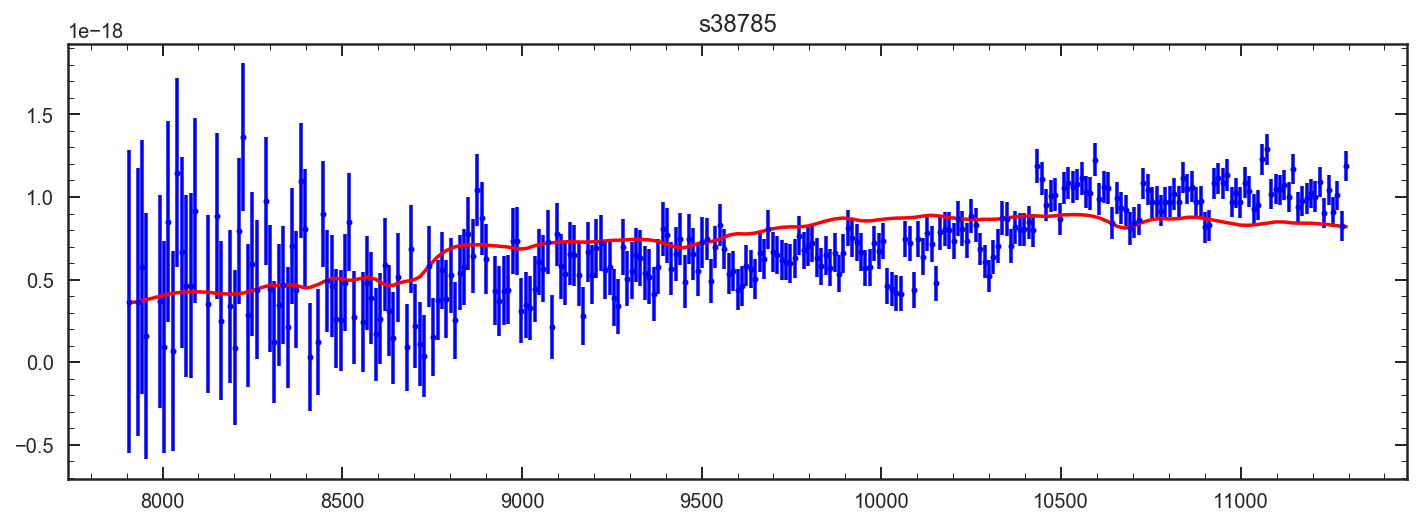

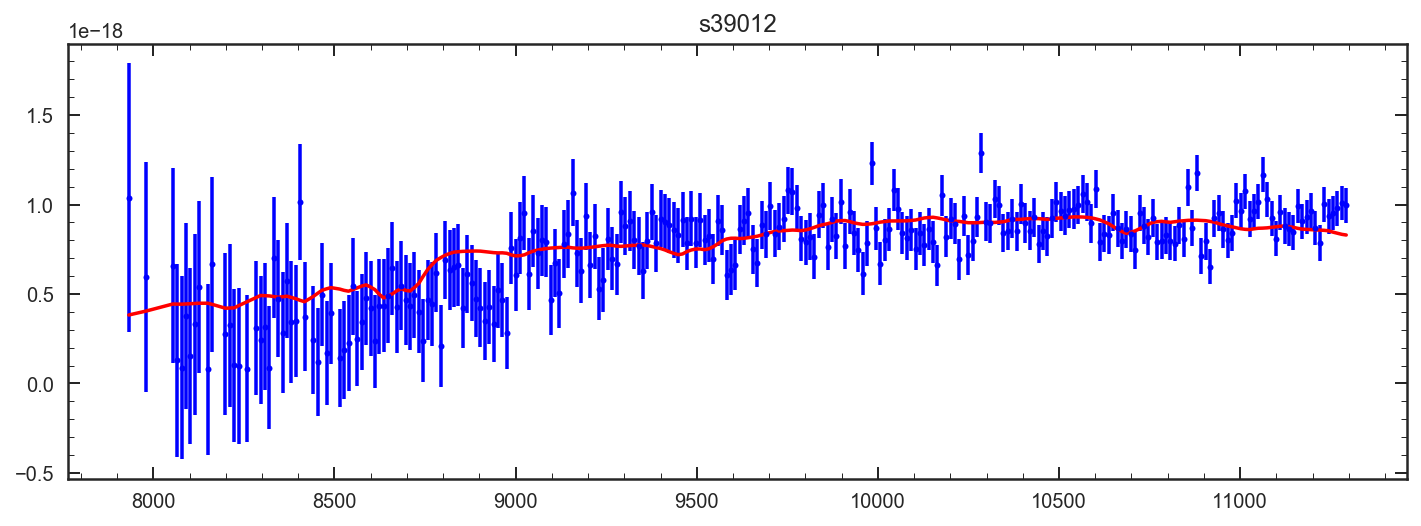

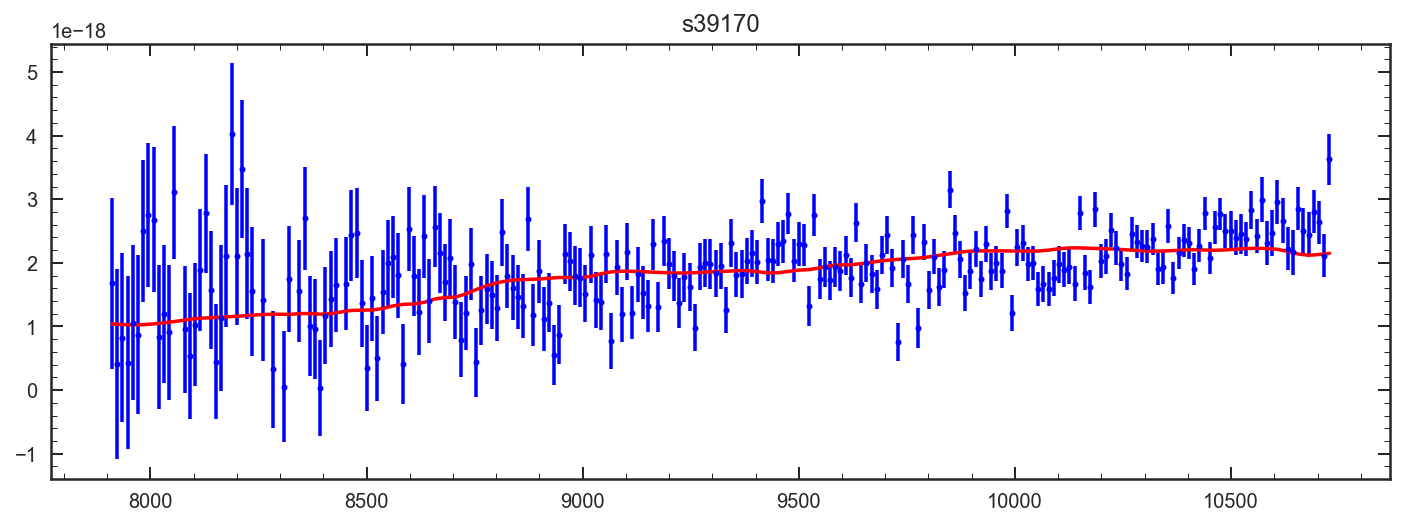

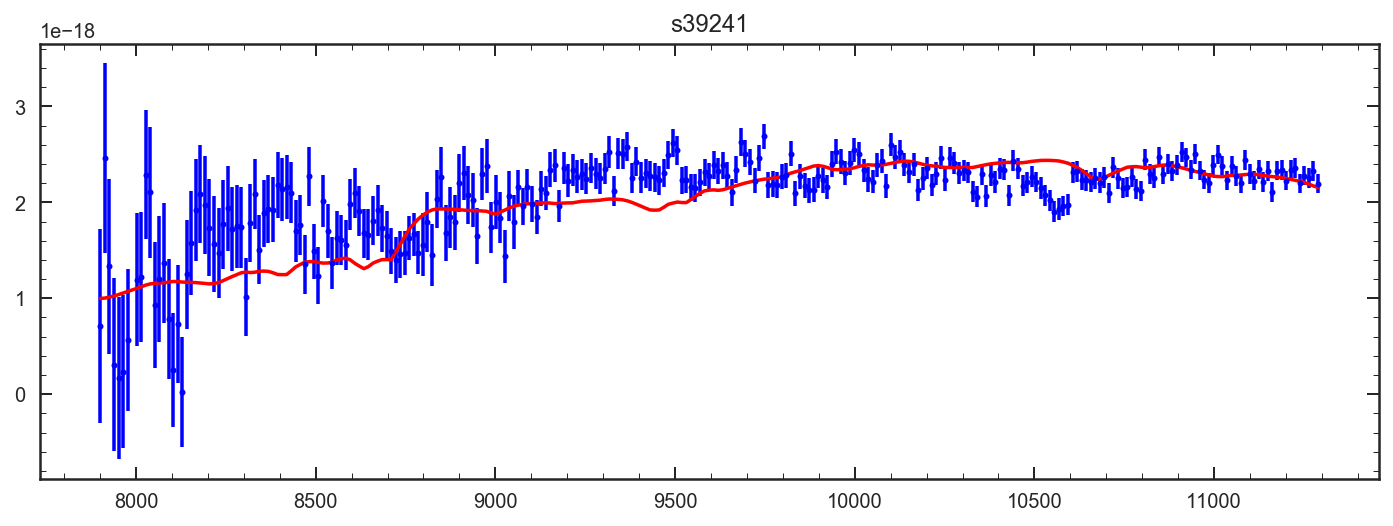

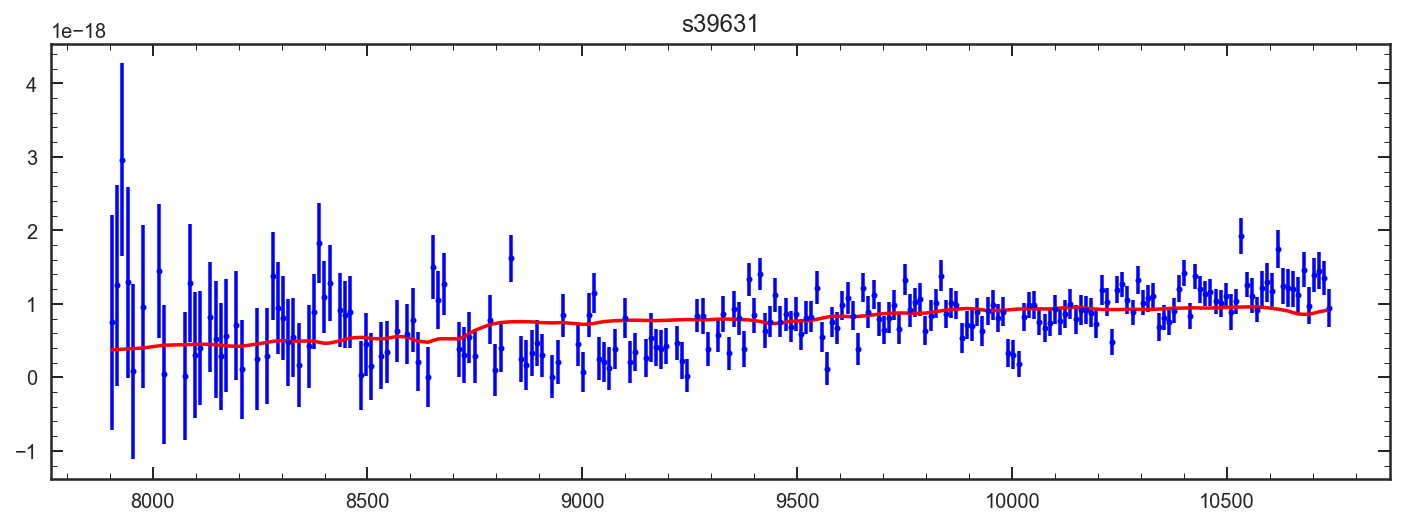

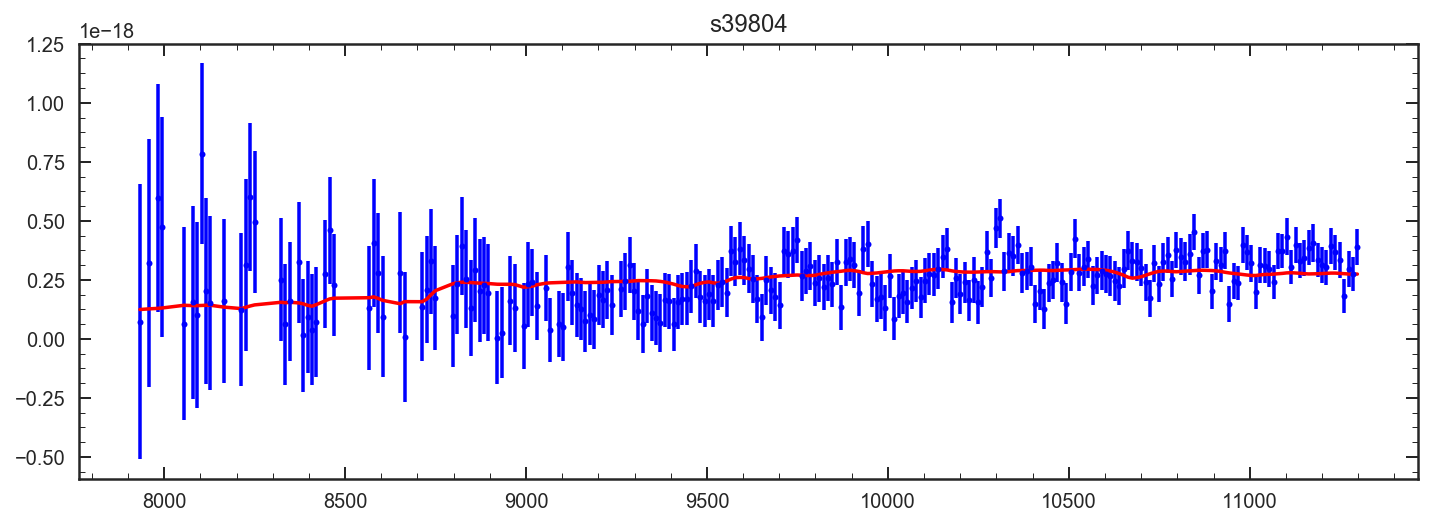

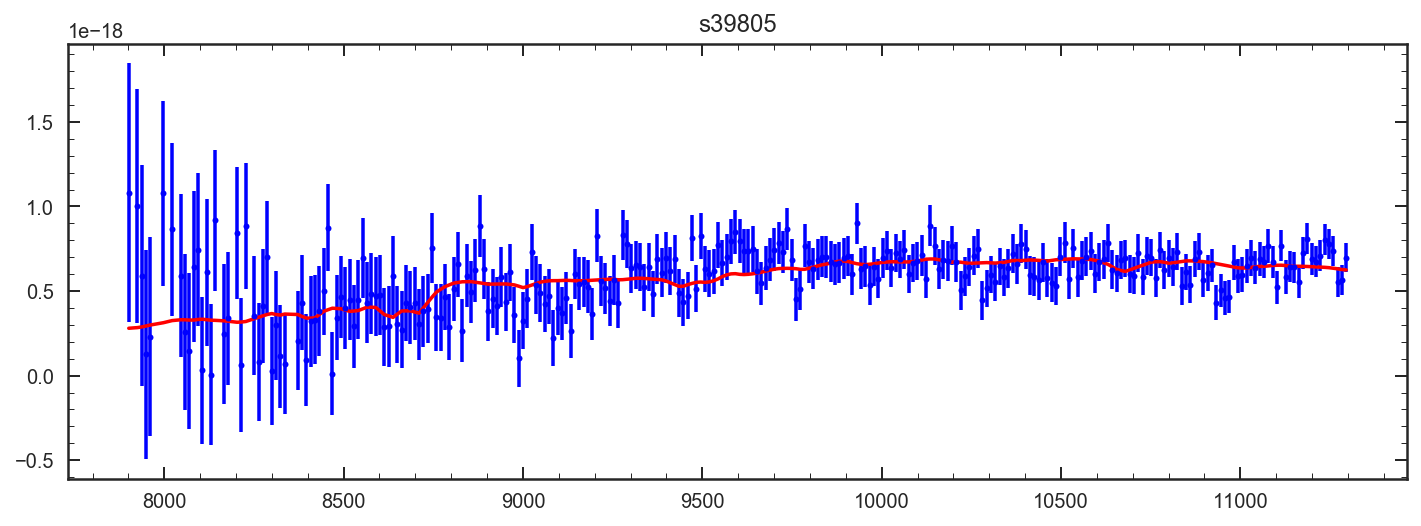

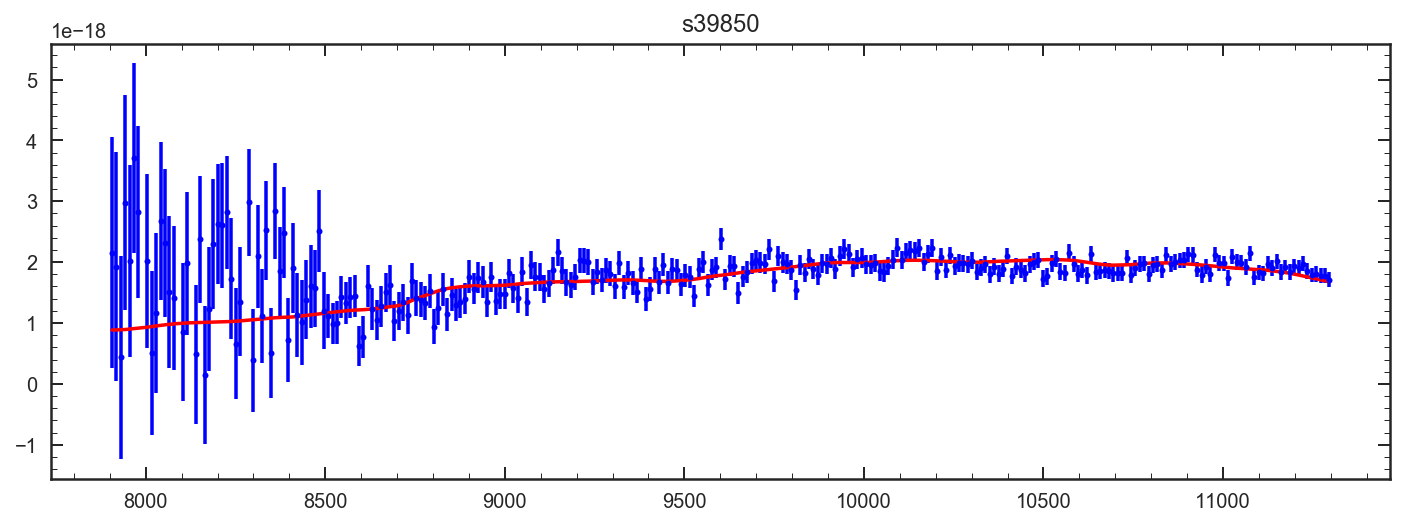

In [305]:
for i in range(len(slist)):
    sp2 = Gen_spec2(os.path.basename(slist[i]).replace('.npy',''),1.2)
    sp2.Sim_spec(0.019,2.0,8.0)
    plt.figure(figsize=[12,4])
    plt.errorbar(sp2.gal_wv,sp2.gal_fl,sp2.gal_er,linestyle='None', marker='o', markersize=3, color='b')
    plt.plot(sp2.gal_wv,sp2.fl,'r')
    plt.title(os.path.basename(blist[i]).replace('.npy',''))

In [282]:
len(blist),len(nbeamid)

(71, 55)

In [279]:
glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(10338))

[]

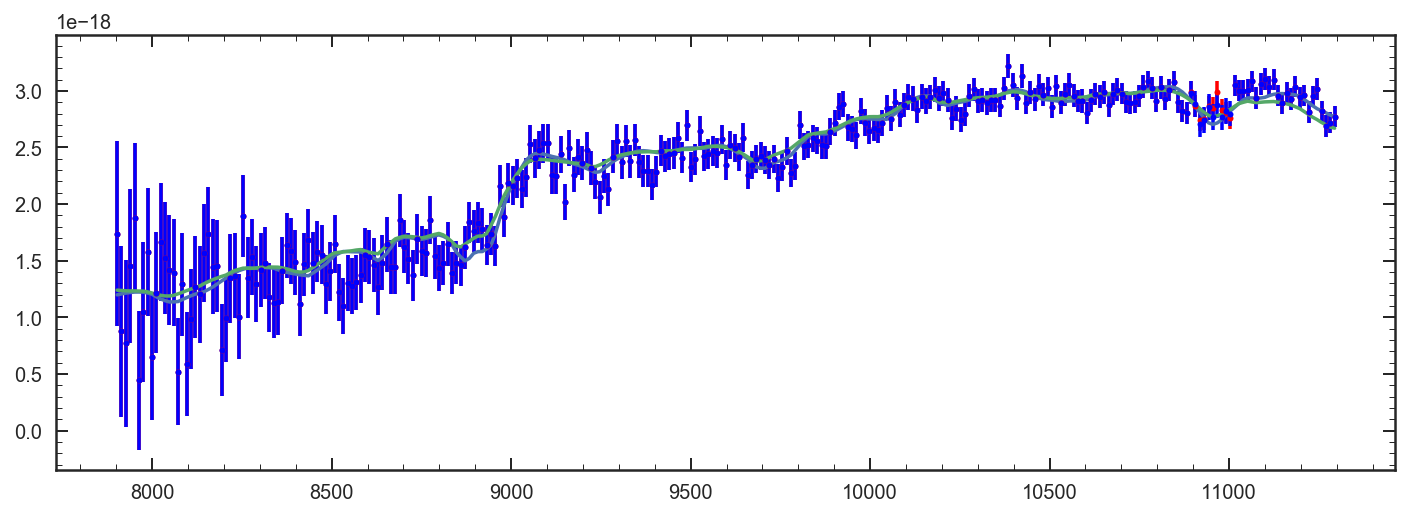

In [273]:
plt.figure(figsize=[12,4])
plt.errorbar(sp2.gal_wv,sp2.gal_fl,sp2.gal_er,linestyle='None', marker='o', markersize=3, color='b')
plt.plot(sp2.gal_wv,sp2.fl)

In [251]:
glob('/Volumes/Vince_research/clear_q_beams/*{0}*'.format(21156))[0]

'/Volumes/Vince_research/clear_q_beams/icxta4mjq_flt_21156.g102.A.fits'

In [300]:
slist = []
for i in blist:
    if int(os.path.basename(i).replace('.npy','')[1:]) in nbeamid:
        slist.append(os.path.basename(i).replace('.npy',''))
#     print(int(os.path.basename(i).replace('.npy','')[1:]))

In [298]:
27231 in nbeamid

True

In [290]:
np.sort(nbeamid)

array([13182, 13774, 16758, 17070, 17436, 19148, 19442, 21156, 21427,
       22210, 22213, 22246, 23081, 23435, 23459, 23758, 24177, 26673,
       27231, 32566, 33453, 33780, 34694, 35774, 37340, 37686, 37955,
       38126, 38191, 38785, 39012, 39170, 39241, 39631, 39804, 39805,
       39850, 40223, 40476, 40597, 40623, 40862, 41148, 41520, 41659,
       42221, 43615, 44042, 44620, 45775, 45972, 46066, 46345, 47677,
       48631])

In [301]:
len(slist)

55